# HOUSING: PRICE PREDICTION

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Technical Requirements:
- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import joblib

Importing all the necessary libraries/dependencies here.

In [3]:
train_df = pd.read_csv("train.csv")

I am importing the train dataset comma separated values file and storing it into our dataframe for further usage.

In [4]:
train_df # checking the first 5 and last 5 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 1168 rows and 81 columns present in our dataframe. In the above cell we can see the training dataset which includes the target label "SalePrice" column and the remaining feature columns that determine or help in predicting the sales. Since sales is a continous value it makes this to be a Regression problem!

# EDA

In [5]:
print("Number of {} Rows and {} Columns in our dataframe".format(train_df.shape[0], train_df.shape[1]))
train_df.head()

Number of 1168 Rows and 81 Columns in our dataframe


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

### Column Description:

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [6]:
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [8]:
train_df.isna().sum().all # checking for missing values

<bound method Series.all of Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndF

Using the `isna` and `sum` fuctions together on our dataframe we can take a look at missing data information. It looks like we do have missing values present in few of our columns. However we will check the percentage of missing information before we began treating them.

In [9]:
print("Missing column values in percentage:")
for col in train_df:
    percentage = np.round((train_df[col].isnull().sum()/train_df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 18.322 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 93.408 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.599 %
MasVnrArea : 0.599 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.568 %
BsmtCond : 2.568 %
BsmtExposure : 2.654 %
BsmtFinType1 : 2.568 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.654 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.0 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
Bedr

So the column names and the percentage of missing data can be seen below:
LotFrontage : 18.322 %
Alley : 93.408 %
MasVnrType : 0.599 %
MasVnrArea : 0.599 %
BsmtQual : 2.568 %
BsmtCond : 2.568 %
BsmtExposure : 2.654 %
BsmtFinType1 : 2.568 %
BsmtFinType2 : 2.654 %
FireplaceQu : 47.175 %
GarageType : 5.479 %
GarageYrBlt : 5.479 %
GarageFinish : 5.479 %
GarageQual : 5.479 %
GarageCond : 5.479 %
PoolQC : 99.401 %
Fence : 79.709 %
MiscFeature : 96.233 %

Now I have decided to drop columns that have most of their values or almost of their values filled with a "null". The columns that I am going to lose are as follows:
Alley : 93.408 %
FireplaceQu : 47.175 %
PoolQC : 99.401 %
Fence : 79.709 %
MiscFeature : 96.233 %

In [10]:
# data preprocessing 1
train_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

I have successfully got rid of all the columns that had most of the values filled with null because treating them would mean manually entering data that was not originally collected properly and that would only make the model biased towards the few information we could get hold of.

In [11]:
print("Number of Rows {} and Columns {} before dropping duplicates.".format(train_df.shape[0], train_df.shape[1]))
train_df.drop_duplicates(inplace=True)
print("Number of Rows {} and Columns {} after dropping duplicates.".format(train_df.shape[0], train_df.shape[1]))

Number of Rows 1168 and Columns 76 before dropping duplicates.
Number of Rows 1168 and Columns 76 after dropping duplicates.


With the `drop_duplicates` option I was trying to get rid of all the duplicate values present in our dataset. However, we can see that there are no duplicate data present in our dataset. I tried doing the same thing for dropping null values but we were losing lots of data.

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In the above cell we see that there are 3 columns with float datatype, 35 columns with integer datatype and 38 columns with object datatype.

In [13]:
train_df.nunique().to_frame("Unique Values")

Unique Values
Id                      1168
MSSubClass                15
MSZoning                   5
LotFrontage              106
LotArea                  892
Street                     2
LotShape                   4
LandContour                4
Utilities                  1
LotConfig                  5
LandSlope                  3
Neighborhood              25
Condition1                 9
Condition2                 8
BldgType                   5
HouseStyle                 8
OverallQual               10
OverallCond                9
YearBuilt                110
YearRemodAdd              61
RoofStyle                  6
RoofMatl                   8
Exterior1st               14
Exterior2nd               15
MasVnrType                 4
MasVnrArea               283
ExterQual                  4
ExterCond                  5
Foundation                 6
BsmtQual                   4
BsmtCond                   4
BsmtExposure               4
BsmtFinType1               6
BsmtFinSF1               551
BsmtFinType2               6
BsmtFinSF2               122
BsmtUnfSF                681
TotalBsmtSF              636
Heating                    6
HeatingQC                  5
CentralAir                 2
Electrical                 5
1stFlrSF                 669
2ndFlrSF                 351
LowQualFinSF              21
GrLivArea                746
BsmtFullBath               4
BsmtHalfBath               3
FullBath                   4
HalfBath                   3
BedroomAbvGr               8
KitchenAbvGr               4
KitchenQual                4
TotRmsAbvGrd              12
Functional                 7
Fireplaces                 4
GarageType                 6
GarageYrBlt               97
GarageFinish               3
GarageCars                 5
GarageArea               392
GarageQual                 5
GarageCond                 5
PavedDrive                 3
WoodDeckSF               244
OpenPorchSF              176
EnclosedPorch            106
3SsnPorch                 18
ScreenPorch               65
PoolArea                   8
MiscVal                   20
MoSold                    12
YrSold                     5
SaleType                   9
SaleCondition              6
SalePrice                581

We are taking a look at all the unique value information present in each of the columns and remove any column that has all the rows filled with same value or all with different unique values since they are not gonna help while building our machine learning model.

In [14]:
# data preprocessing 2
train_df.drop(["Id", "Utilities"], axis=1, inplace=True)

I see that column Id has all the rows filled with unique data while the column Utilities has only 1 unique value occupying all the rows so they both are pretty useless and I have gotten rid of them from our dataframe.

In [15]:
object_datatype = []
for x in train_df.dtypes.index:
    if train_df.dtypes[x] == 'O':
        object_datatype.append(x)        
print(f"Object Datatype Column Names", object_datatype)

numeric_datatype = []
for x in train_df.dtypes.index:
    if train_df.dtypes[x] == 'int64' or train_df.dtypes[x] == 'float64':
        numeric_datatype.append(x)
print(f"\nNumeric Datatype Column Names:", numeric_datatype)

Object Datatype Column Names ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numeric Datatype Column Names: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 

Since we have numeric as well as object datatype values I have separated those columns names in 2 different list variables that would be usefull in further analysis.

In [16]:
train_df.describe().T

count           mean           std      min        25%  \
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       3.0  
GarageYrBlt      1980.0    2002.0    2010.0  
GarageC

Using the `describe` method in transpose format I am taking a look at all the numeric value details and basically the count, mean, standard deviation, min, 25%, 50%, 75% and max quartile values.

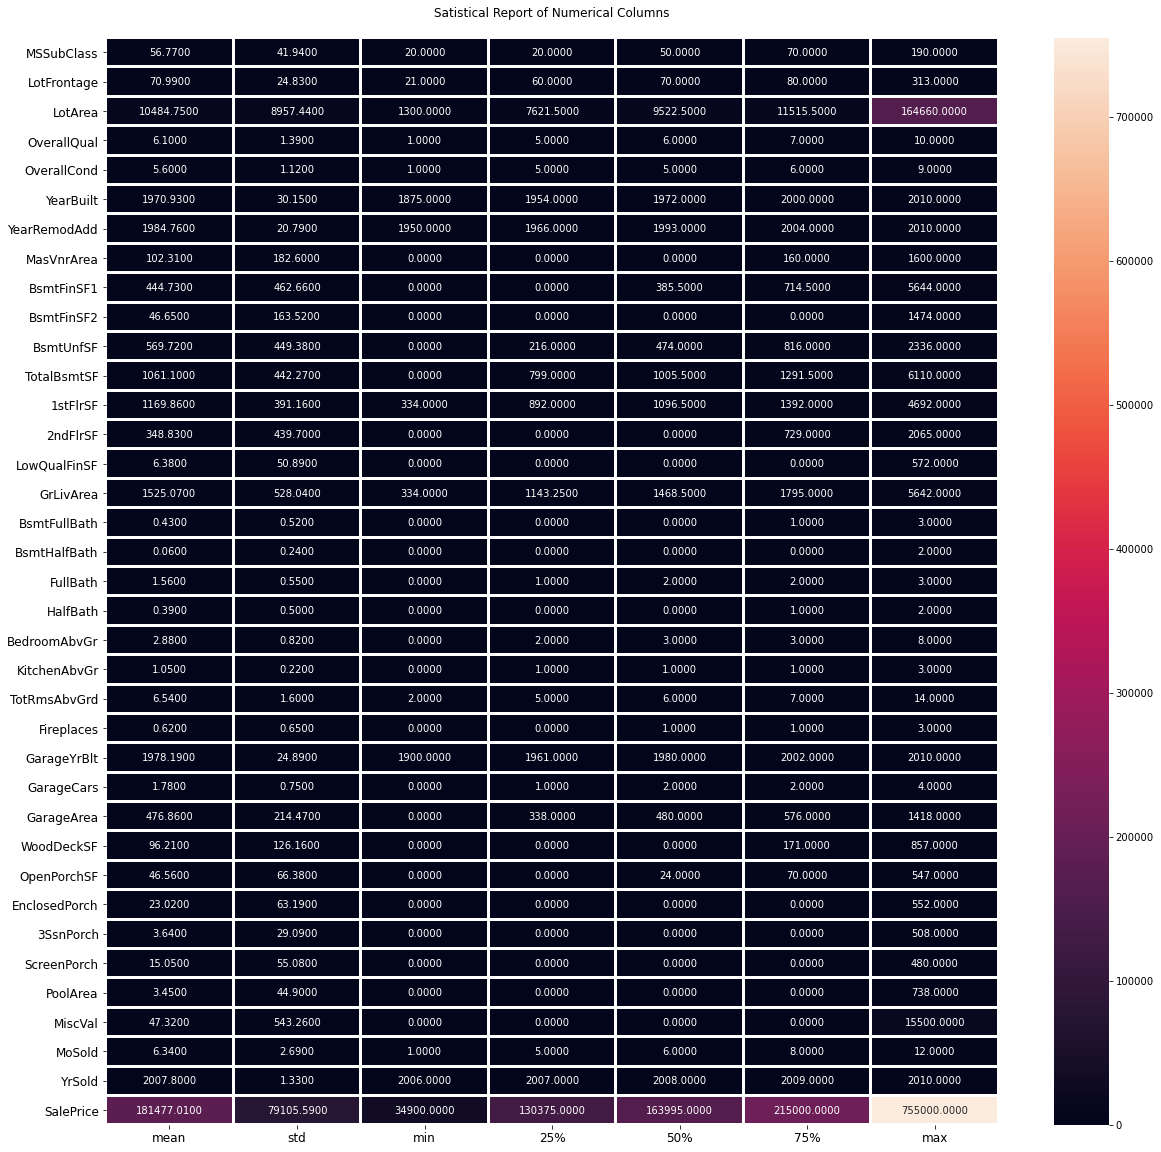

In [17]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (20,20))
sns.heatmap(round(train_df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Using the above visualization on the `describe` method we are able to observe that our target label "SalePrice" has values that are higher than the other feature column details.

In [18]:
for col in object_datatype:
    print(col)
    print(train_df[col].value_counts())
    print("--"*60)

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
------------------------------------------------------------------------------------------------------------------------
LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
------------------------------------------------------------------------------------------------------------------------
LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
------------------------------------------------------------------------------------------------------------------------
LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
------------------------------------------------------

In the above cell I am taking a look at all the unique value details present in columns that have object datatype values stored in them.

In [19]:
train_df.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.365220 -0.124151     0.070462    -0.056978   
LotFrontage     -0.365220     1.000000  0.557257     0.247809    -0.053345   
LotArea         -0.124151     0.557257  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.247809  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.053345  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.118554  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.096050  0.027228     0.555945     0.080669   
MasVnrArea       0.027868     0.202225  0.121448     0.409163    -0.137882   
BsmtFinSF1      -0.052236     0.247780  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.002514  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.123943  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.386261  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.448186  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.099250  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.007885 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.410414  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.104255  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001528  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.189321  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.053168  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.264010  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002890 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.351969  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.262076  0.285983     0.390067    -0.013632   
GarageYrBlt      0.077630     0.061101 -0.034981     0.541719    -0.318278   
GarageCars      -0.027639     0.276798  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.344908  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.101751  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.167092  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.023118 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.059508  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.033111  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.223429  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.004559  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.025046  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.004296 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.341294  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.027868   -0.052236   -0.062403   
LotFrontage     0.118554      0.096050    0.202225    0.247780    0.002514   
LotArea         0.005506      0.027228    0.121448    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.409163    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.137882   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.323006    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.181869    0.114430   -0.044694   
MasVnrArea      0.323006      0.181869    1.000000    0.267066   -0.065723   
BsmtFinSF1      0.227933      0.114430    0.267066    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.065723   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.109850   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.366833    0.518940    0.098167   
1stFlrSF        0.279450      0.2333

Checking the correlation values for all the numeric datatype columns.

In [20]:
print("Missing Value Data:")
print(train_df.isnull().sum())
print("\nDataframe Information:")
train_df.info()

Missing Value Data:
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath      

Performing analysis in the above cell I was able to come to a conclusion on how I would want to handle the missing data issue in my dataset. I am planning to replace the object datatype columns with mode values and numeric datatype columns with it's mean values.

Mode:
- MasVnrType
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- GarageType
- GarageFinish
- GarageQual
- GarageCond

Mean:
- LotFrontage
- MasVnrArea
- GarageYrBlt

# Filling the missing values using mean and mode options

In [21]:
# data preprocessing 3
mode = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType",
        "GarageFinish", "GarageQual", "GarageCond"]
mean = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

for i in mode:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])
    
for j in mean:
    train_df[j] = train_df[j].fillna(train_df[j].mean())
    
print("Missing values count after filling the data")
print(train_df.isna().sum())

Missing values count after filling the data
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kitche

Great it looks like we have handled the missing values issue and now none of the columns have any null value in them.

# Visualization

In [22]:
train_df.nunique().sort_values()

CentralAir         2
Street             2
GarageFinish       3
HalfBath           3
LandSlope          3
BsmtHalfBath       3
PavedDrive         3
BsmtExposure       4
BsmtCond           4
BsmtQual           4
MasVnrType         4
Fireplaces         4
KitchenQual        4
ExterQual          4
FullBath           4
KitchenAbvGr       4
BsmtFullBath       4
LotShape           4
LandContour        4
Electrical         5
MSZoning           5
YrSold             5
ExterCond          5
LotConfig          5
BldgType           5
GarageCond         5
HeatingQC          5
GarageQual         5
GarageCars         5
GarageType         6
SaleCondition      6
BsmtFinType2       6
Heating            6
Foundation         6
RoofStyle          6
BsmtFinType1       6
Functional         7
RoofMatl           8
PoolArea           8
HouseStyle         8
Condition2         8
BedroomAbvGr       8
OverallCond        9
Condition1         9
SaleType           9
OverallQual       10
TotRmsAbvGrd      12
MoSold       

I have sorted the unique values column name list to see the one's with least unique values and the one's with the most in them.

In [23]:
single = ["CentralAir", "Street", "GarageFinish", "HalfBath", "LandSlope", "BsmtHalfBath", "PavedDrive", "BsmtExposure",
         "BsmtCond", "BsmtQual", "MasVnrType", "Fireplaces", "KitchenQual", "ExterQual", "FullBath", "KitchenAbvGr",
         "BsmtFullBath", "LotShape", "LandContour", "Electrical", "MSZoning", "YrSold", "ExterCond", "LotConfig",
         "BldgType", "GarageCond", "HeatingQC", "GarageQual", "GarageCars", "GarageType", "SaleCondition", "BsmtFinType2",
         "Heating", "Foundation", "RoofStyle", "BsmtFinType1", "Functional", "RoofMatl", "PoolArea", "HouseStyle",
         "Condition2", "BedroomAbvGr", "OverallCond", "Condition1", "SaleType"]

double = ["OverallQual", "TotRmsAbvGrd", "MoSold", "Exterior1st", "MSSubClass", "Exterior2nd", "3SsnPorch", "MiscVal", 
          "LowQualFinSF", "Neighborhood", "YearRemodAdd", "ScreenPorch", "GarageYrBlt"]

triple = ["EnclosedPorch", "LotFrontage", "YearBuilt", "BsmtFinSF2", "OpenPorchSF", "WoodDeckSF", "MasVnrArea", 
          "2ndFlrSF", "GarageArea", "BsmtFinSF1", "SalePrice", "TotalBsmtSF", "1stFlrSF", "BsmtUnfSF", "GrLivArea", 
          "LotArea"]

I have separated the column names as per the unique values they hold in single digit, double digit and triple digit formats.

Single Digit Unique Values:
- CentralAir         2
- Street             2
- GarageFinish       3
- HalfBath           3
- LandSlope          3
- BsmtHalfBath       3
- PavedDrive         3
- BsmtExposure       4
- BsmtCond           4
- BsmtQual           4
- MasVnrType         4
- Fireplaces         4
- KitchenQual        4
- ExterQual          4
- FullBath           4
- KitchenAbvGr       4
- BsmtFullBath       4
- LotShape           4
- LandContour        4
- Electrical         5
- MSZoning           5
- YrSold             5
- ExterCond          5
- LotConfig          5
- BldgType           5
- GarageCond         5
- HeatingQC          5
- GarageQual         5
- GarageCars         5
- GarageType         6
- SaleCondition      6
- BsmtFinType2       6
- Heating            6
- Foundation         6
- RoofStyle          6
- BsmtFinType1       6
- Functional         7
- RoofMatl           8
- PoolArea           8
- HouseStyle         8
- Condition2         8
- BedroomAbvGr       8
- OverallCond        9
- Condition1         9
- SaleType           9

Double Digit Unique Values:
- OverallQual       10
- TotRmsAbvGrd      12
- MoSold            12
- Exterior1st       14
- MSSubClass        15
- Exterior2nd       15
- 3SsnPorch         18
- MiscVal           20
- LowQualFinSF      21
- Neighborhood      25
- YearRemodAdd      61
- ScreenPorch       65
- GarageYrBlt       98

Triple Digit Unique Values:
- EnclosedPorch    106
- LotFrontage      107
- YearBuilt        110
- BsmtFinSF2       122
- OpenPorchSF      176
- WoodDeckSF       244
- MasVnrArea       284
- 2ndFlrSF         351
- GarageArea       392
- BsmtFinSF1       551
- SalePrice        581
- TotalBsmtSF      636
- 1stFlrSF         669
- BsmtUnfSF        681
- GrLivArea        746
- LotArea          892

Column name: CentralAir


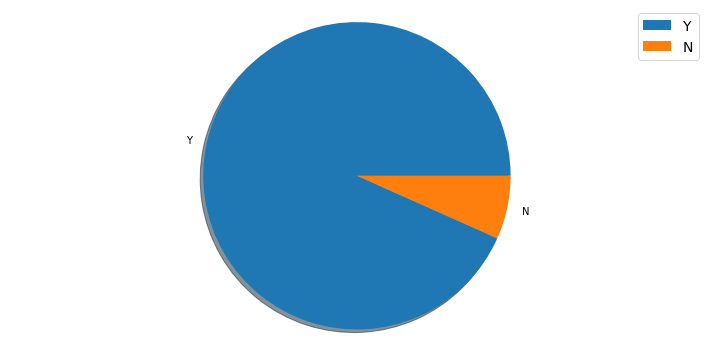

Column name: Street


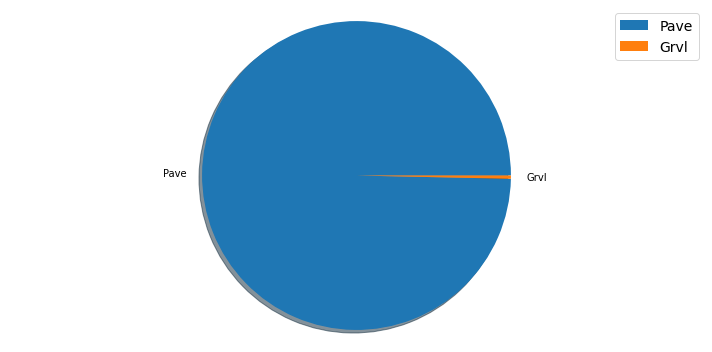

Column name: GarageFinish


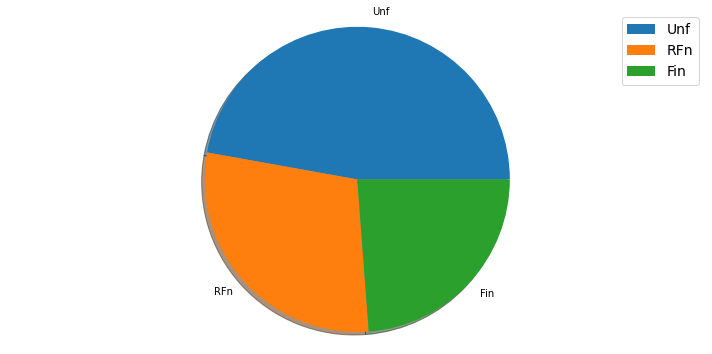

Column name: HalfBath


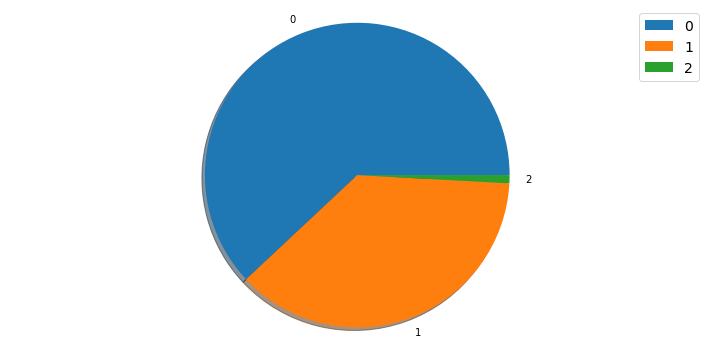

Column name: LandSlope


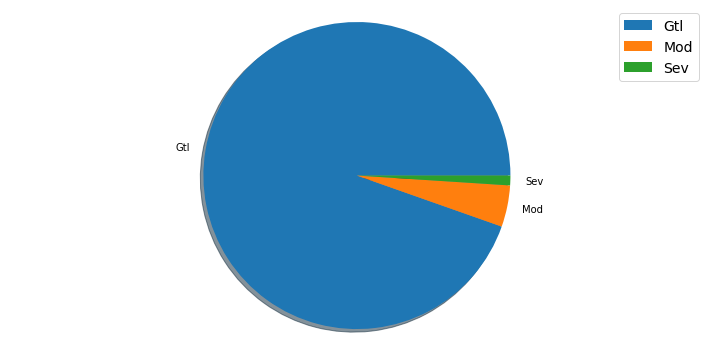

Column name: BsmtHalfBath


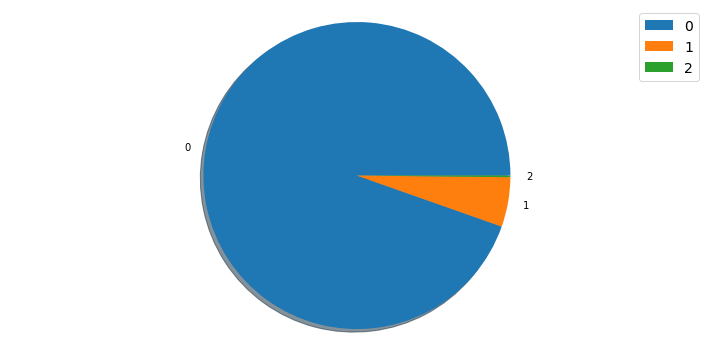

Column name: PavedDrive


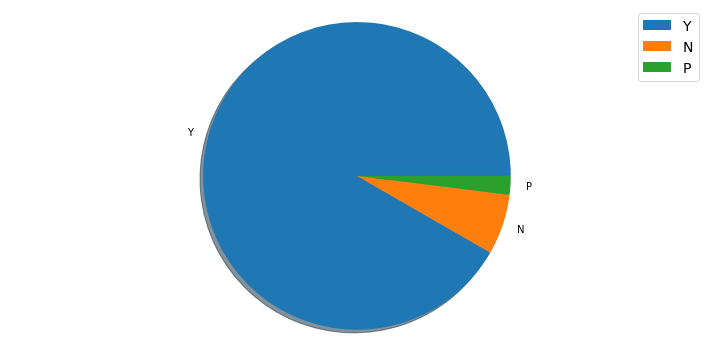

Column name: BsmtExposure


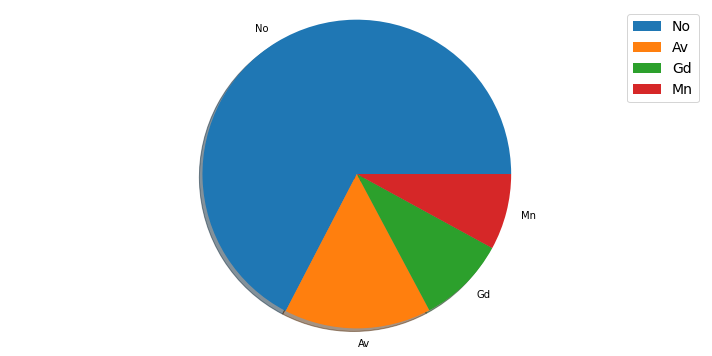

Column name: BsmtCond


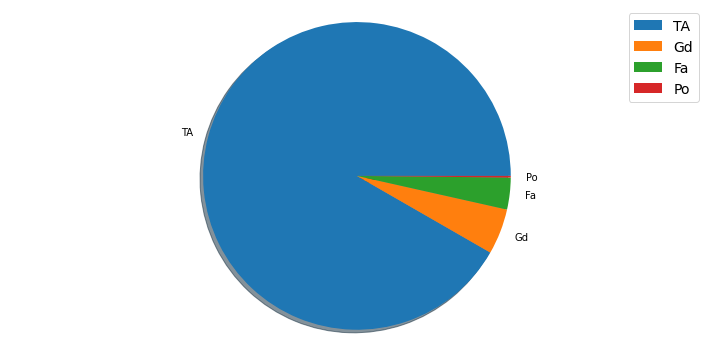

Column name: BsmtQual


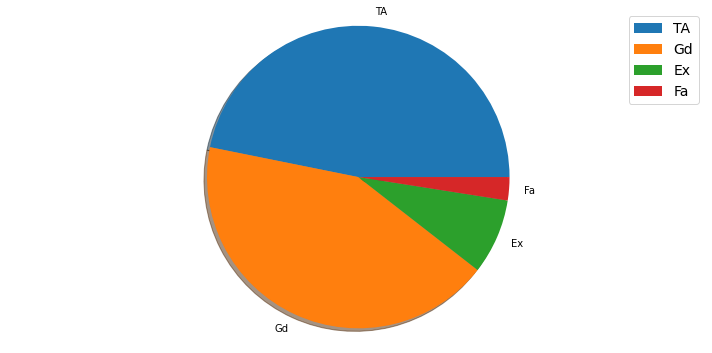

Column name: MasVnrType


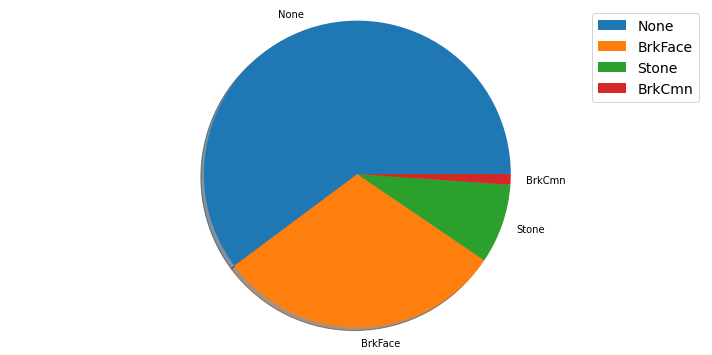

Column name: Fireplaces


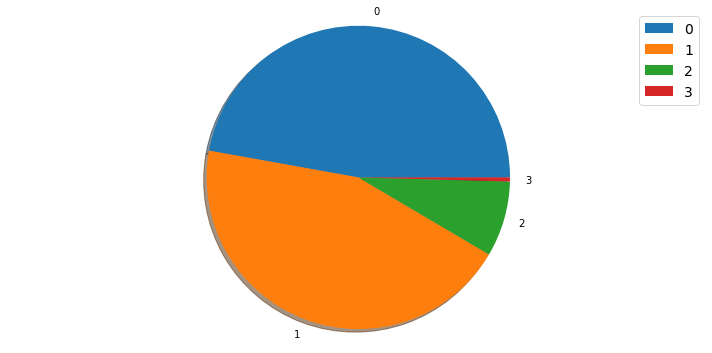

Column name: KitchenQual


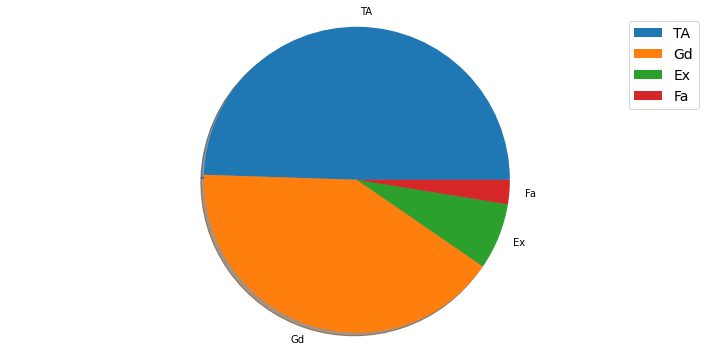

Column name: ExterQual


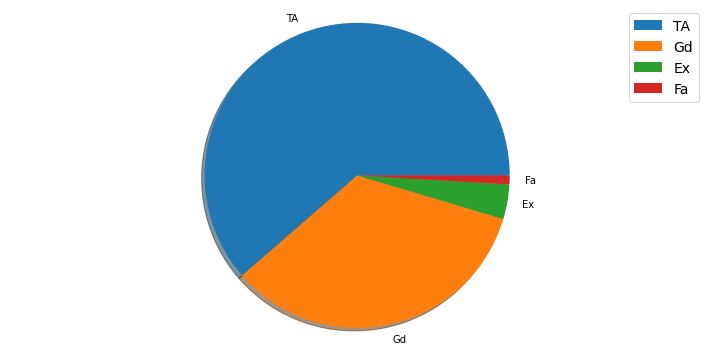

Column name: FullBath


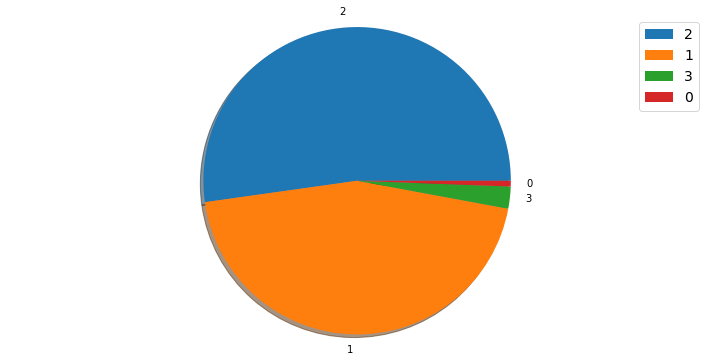

Column name: KitchenAbvGr


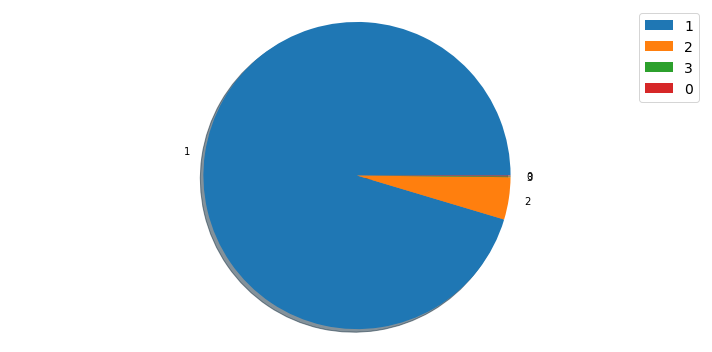

Column name: BsmtFullBath


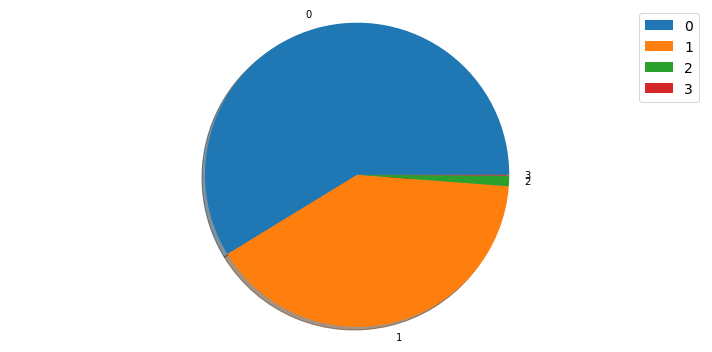

Column name: LotShape


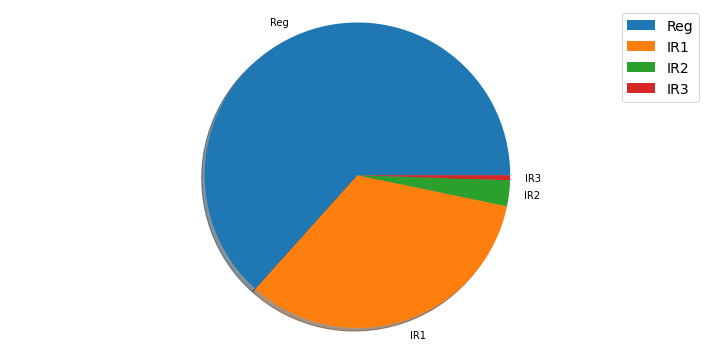

Column name: LandContour


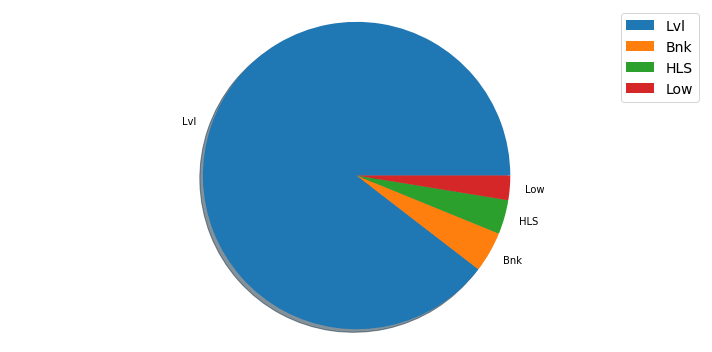

Column name: Electrical


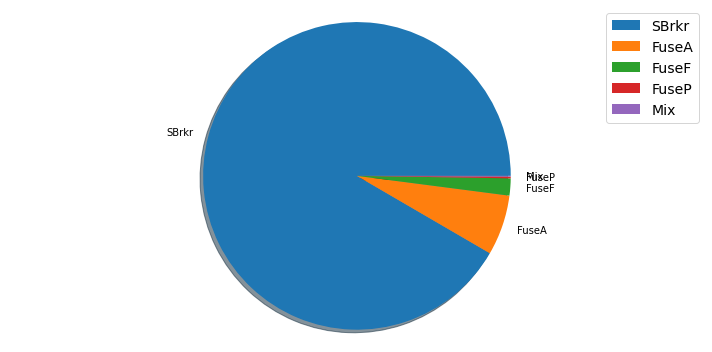

Column name: MSZoning


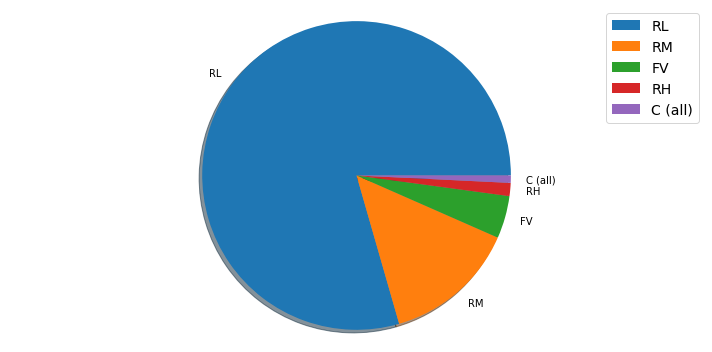

Column name: YrSold


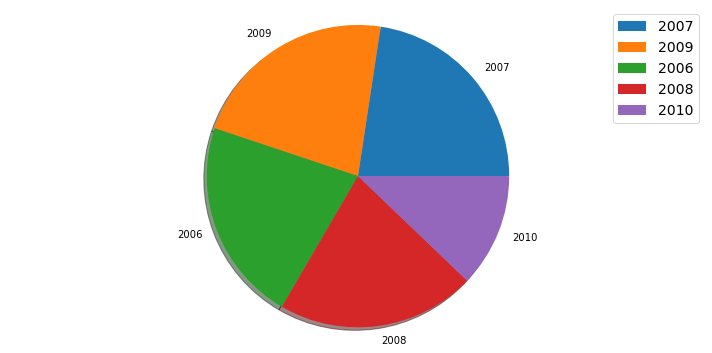

Column name: ExterCond


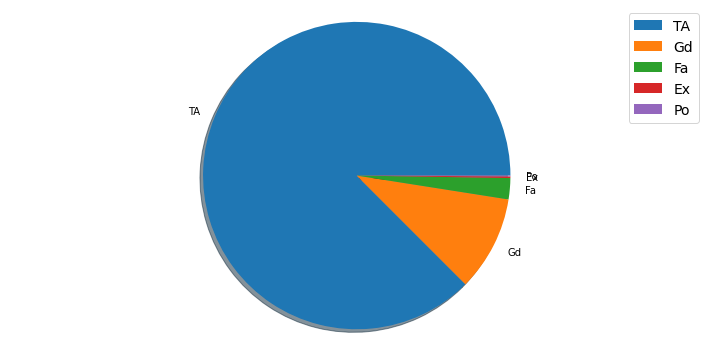

Column name: LotConfig


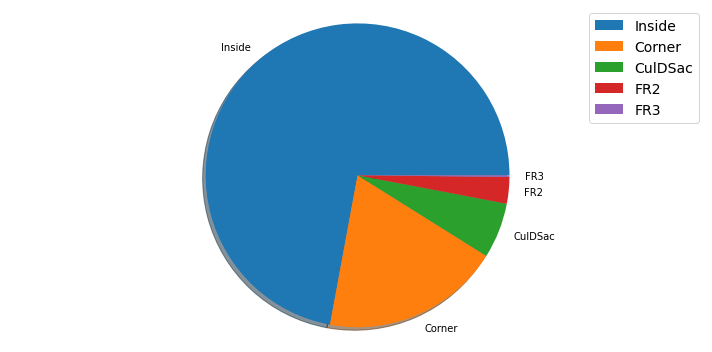

Column name: BldgType


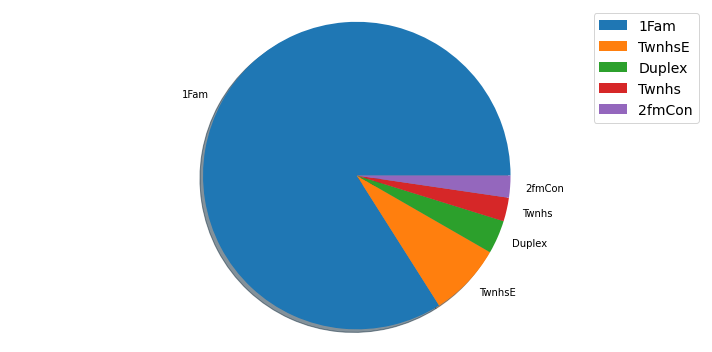

Column name: GarageCond


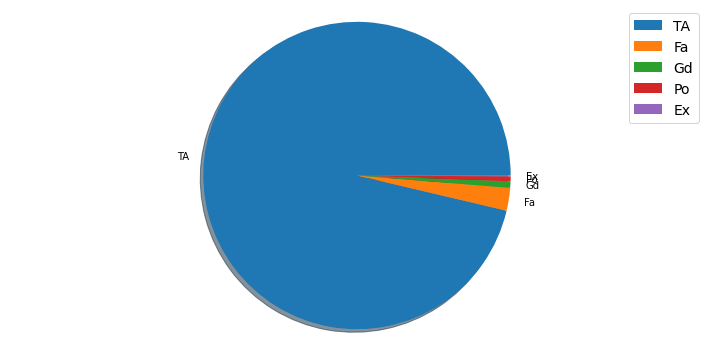

Column name: HeatingQC


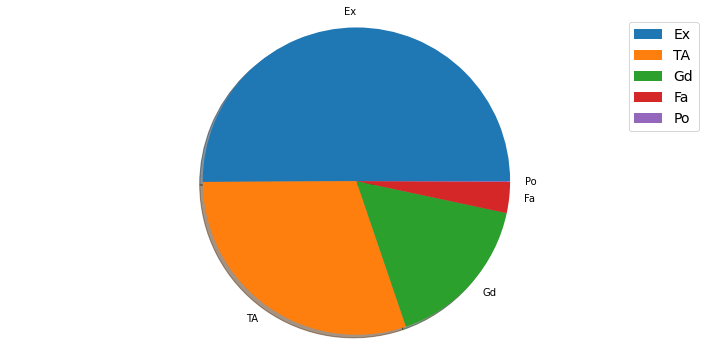

Column name: GarageQual


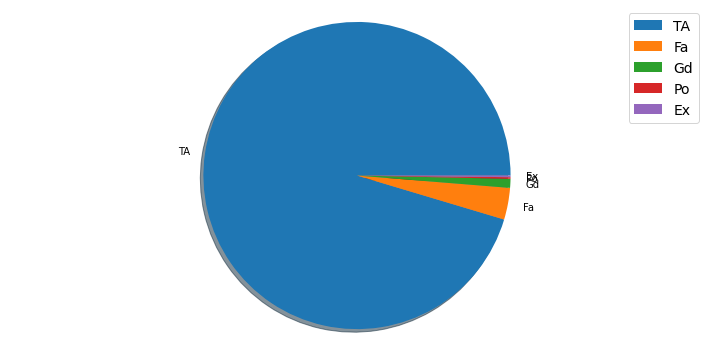

Column name: GarageCars


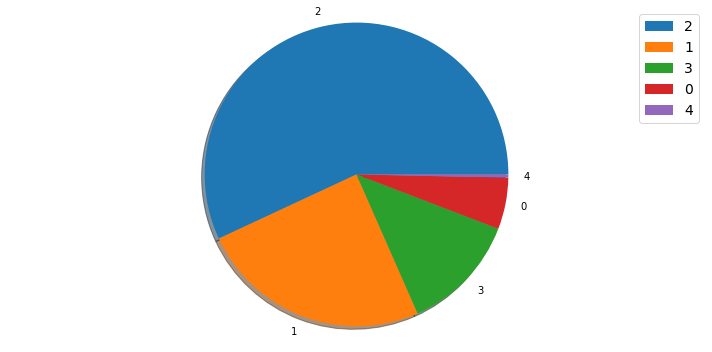

Column name: GarageType


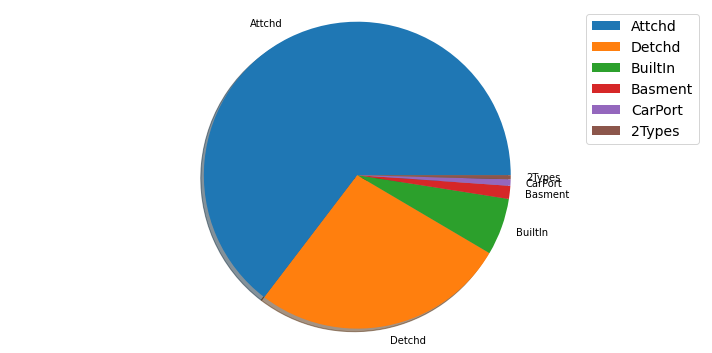

Column name: SaleCondition


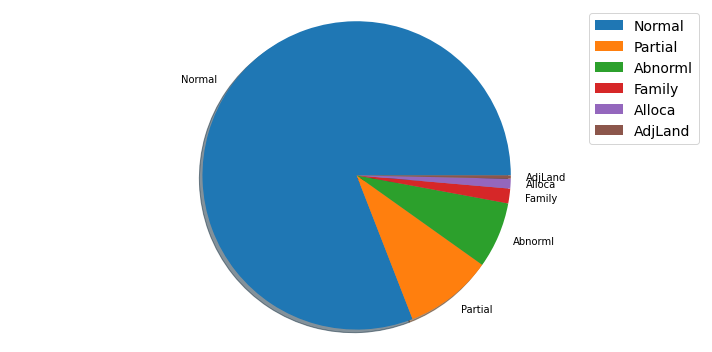

Column name: BsmtFinType2


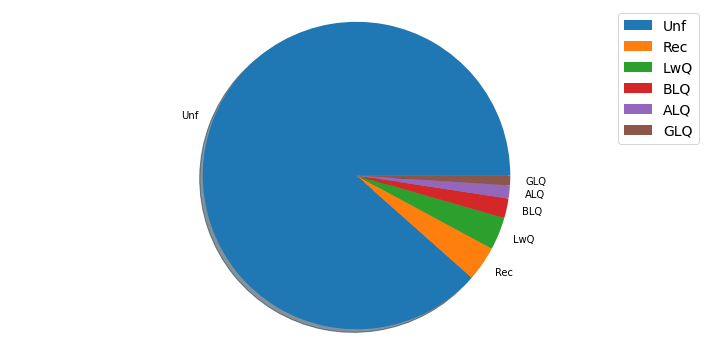

Column name: Heating


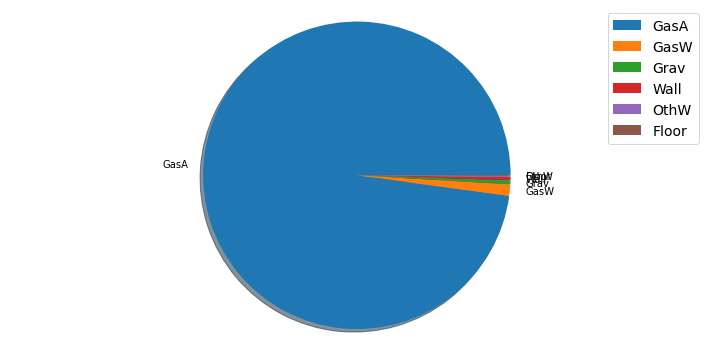

Column name: Foundation


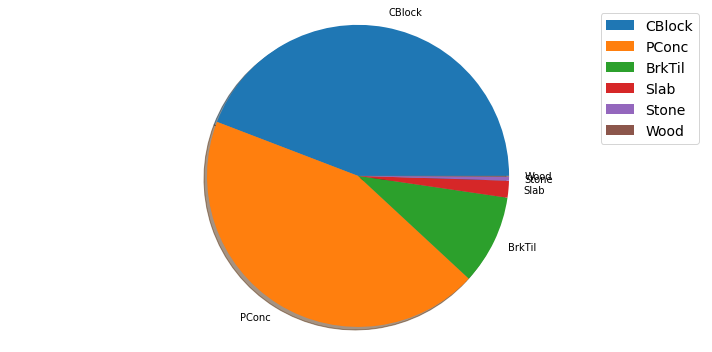

Column name: RoofStyle


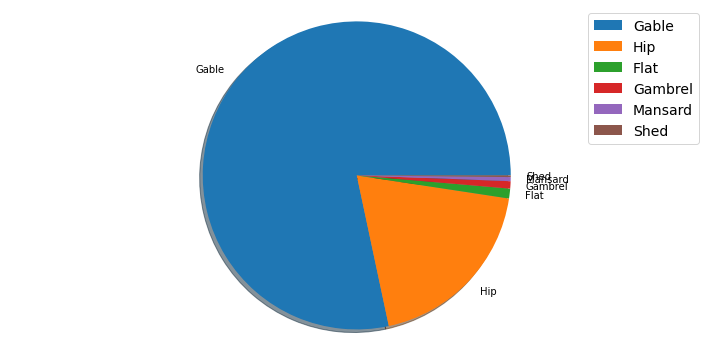

Column name: BsmtFinType1


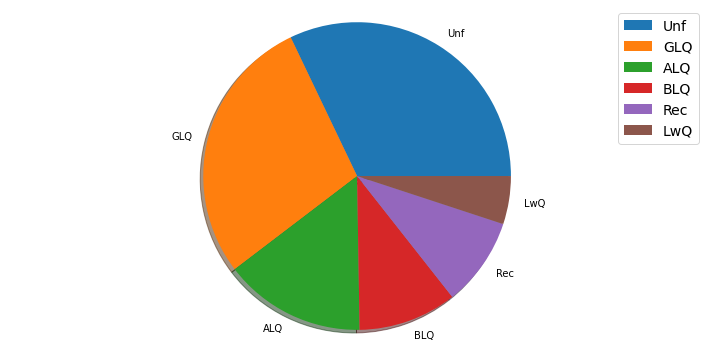

Column name: Functional


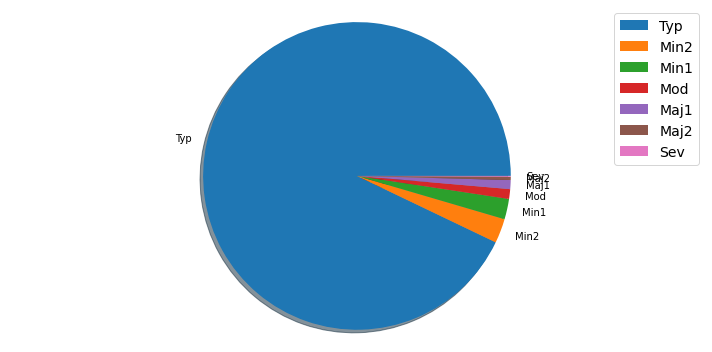

Column name: RoofMatl


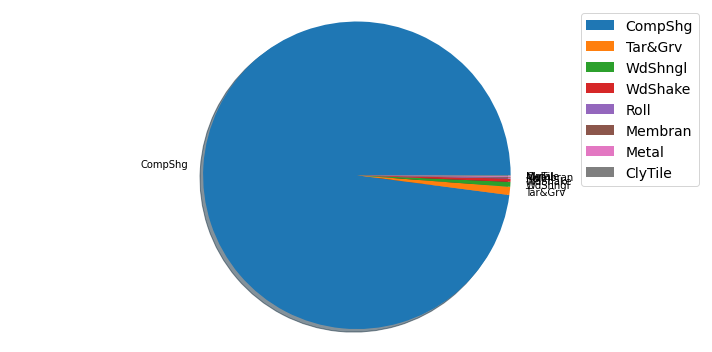

Column name: PoolArea


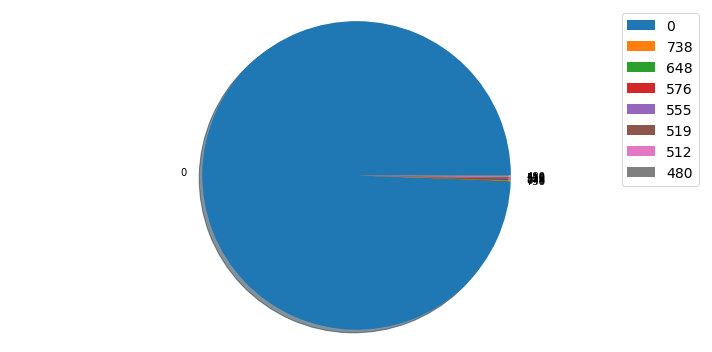

Column name: HouseStyle


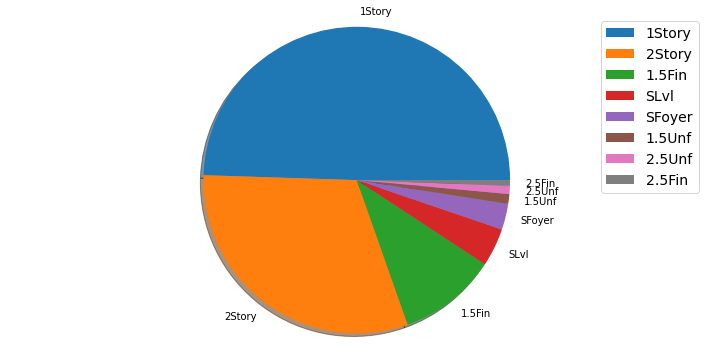

Column name: Condition2


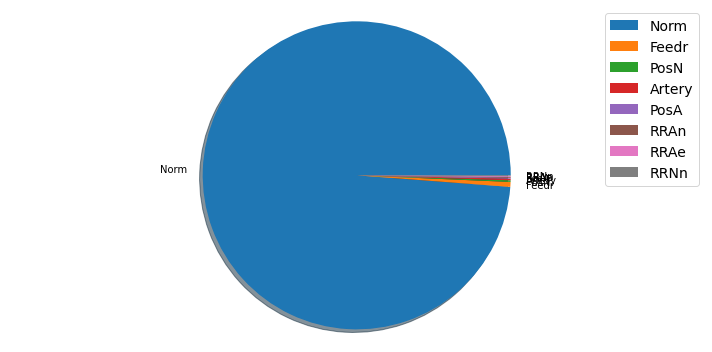

Column name: BedroomAbvGr


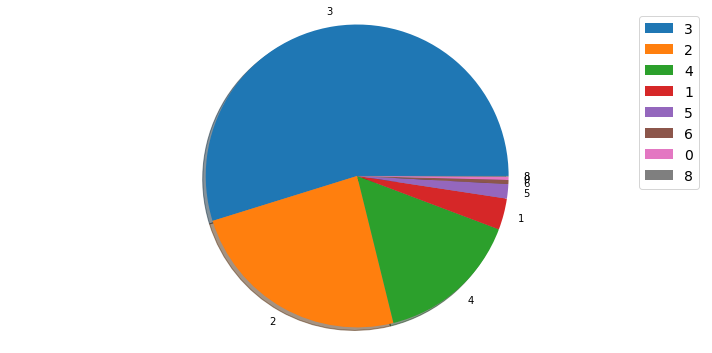

Column name: OverallCond


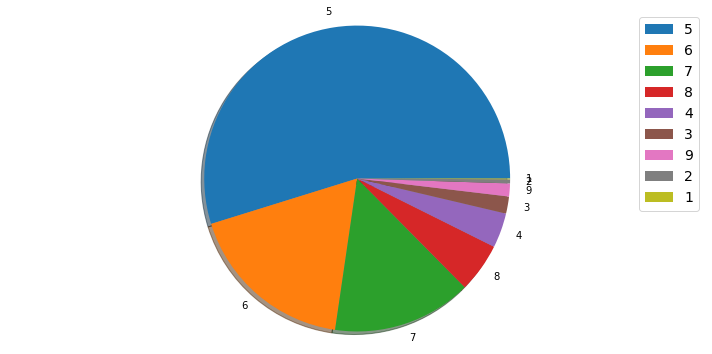

Column name: Condition1


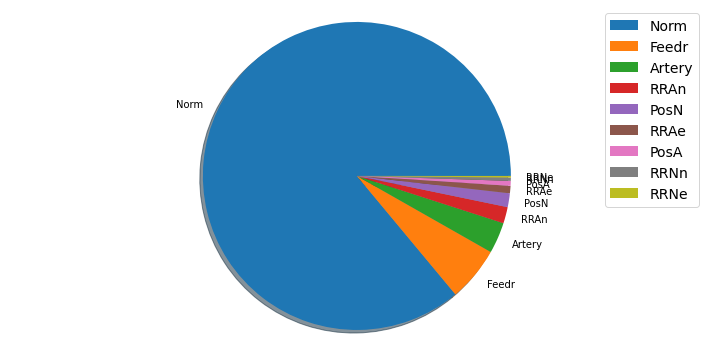

Column name: SaleType


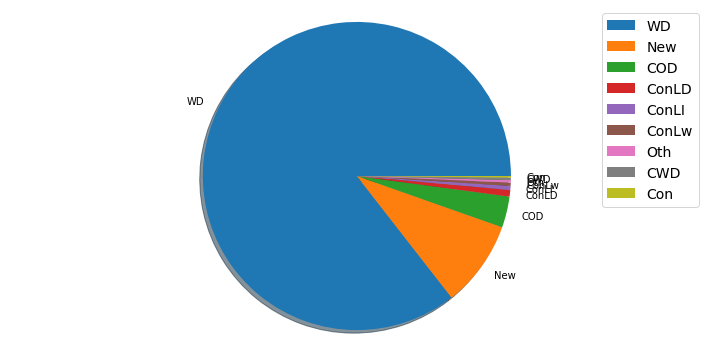

In [24]:
def generate_pie(x):
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

for i in train_df[single]:
    print(f"Column name:", i)
    generate_pie(train_df[i])

### Observations:

for feature LotFrontage:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 21 to 313 with mean value 70.99
•	Data is sort of positively skewed.
for feature LotArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1300 to 164660 with mean value 10484.75
•	Data is highly positively skewed and needs to be treated accordingly.
for feature YearBuilt:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1875 to 2010 with mean value 1971
•	Data is sort of negatively skewed.
for feature YearRemodAdd:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1950 to 2010 with mean value 1985
•	Data is sort of negatively skewed.
for feature MassVnrArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1600 with mean value 102.31
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature BsmtFinSF1:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 5644 with mean value 444.73
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature BsmtFinSF2:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1474 with mean value 46.65
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature BsmtUnfSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2336 with mean value 569.72
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature TotalBsmtSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 6110 with mean value 1061.1
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature 1stFlrSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 334 to 4692 with mean value 1169.86
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature 2ndFlrSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2065 with mean value 348.83
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature LowQualFinSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 572 with mean value 6.38
•	Data is highly positively skewed and needs to be treated accordingly.
for feature GrLivArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 334 to 5642 with mean value 1525.07
•	Data is sort of positively skewed.
•	Data is spreaded.
for feature BsmtFullBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 0.43
for feature BsmtHalfBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2 with mean value 0.06
•	Data is positively skewed.
for feature FullBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 1.56
for feature HalfBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2 with mean value 0.39
for feature BedroomAbvGr:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 8 with mean value 2.88
for feature KitchenAbvGr:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 1.05
for feature TotRmsAbvGrd:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 2 to 14 with mean value 6.54
for feature Fireplaces:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 0.62
for feature GarageYrBlt:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1900 to 2010 with mean value 1978
for feature GarageCars:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 4 with mean value 1.78
for feature GarageArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1418 with mean value 776.86
for feature WoodDeckSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 857 with mean value 96.21
•	Data is spreaded.
for feature OpenPorchSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 547 with mean value 46.56
•	Data is spreaded.
for feature EnclosedPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 552 with mean value 23.02
for feature 3SsnPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 508 with mean value 3.64
for feature ScreenPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 480 with mean value 15.05
•	Data is positively high skewed.
for feature PoolArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 738 with mean value 345
for feature MiscVal:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 15500 with mean value 47.32
•	Data is positively high skewed.
for feature MoSold:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1 to 12 with mean value 6.34
for feature YrSold:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 2006 to 2010 with mean value 2007
for feature SalePrice:
•	Data is somewhat distributed normally but not in bell curve.
•	Data ranges from 34900 to 755000 with mean value 181477.01

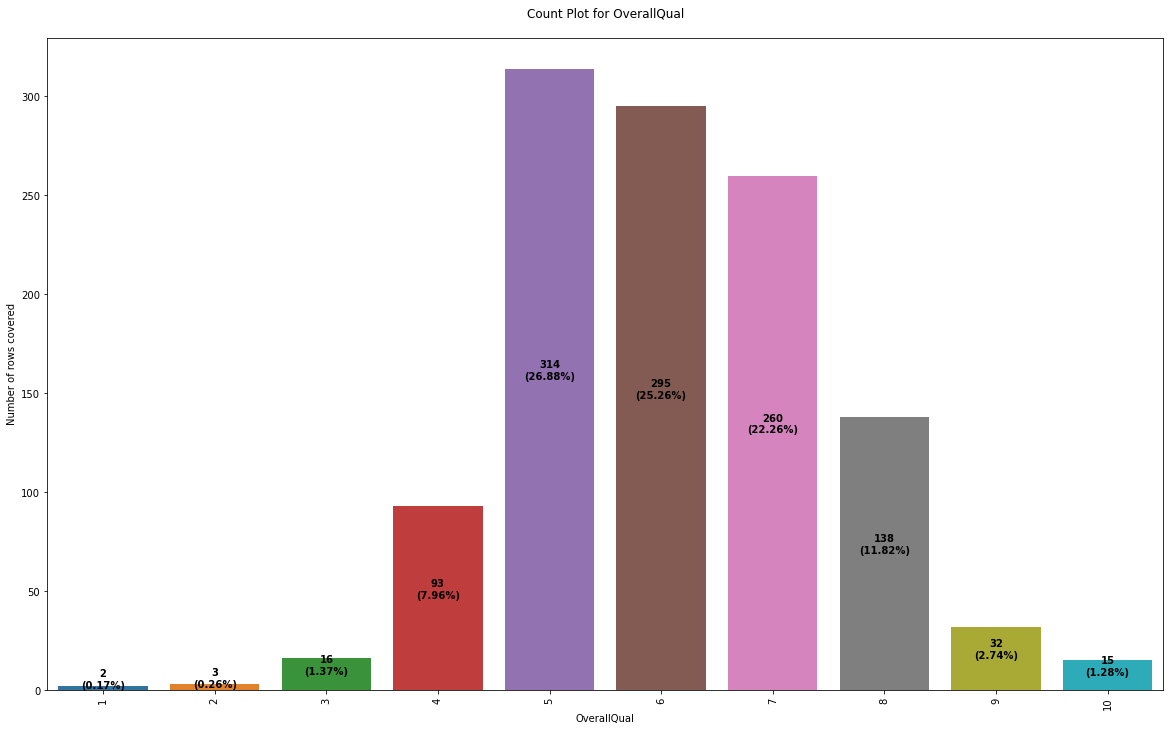

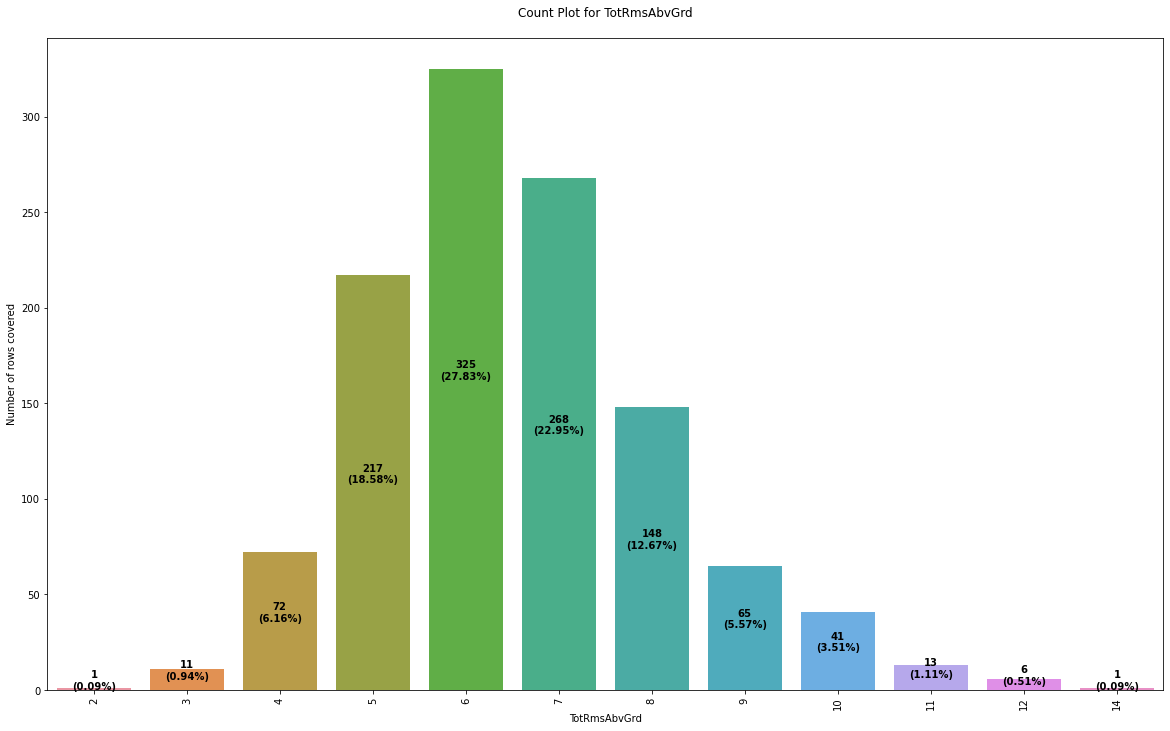

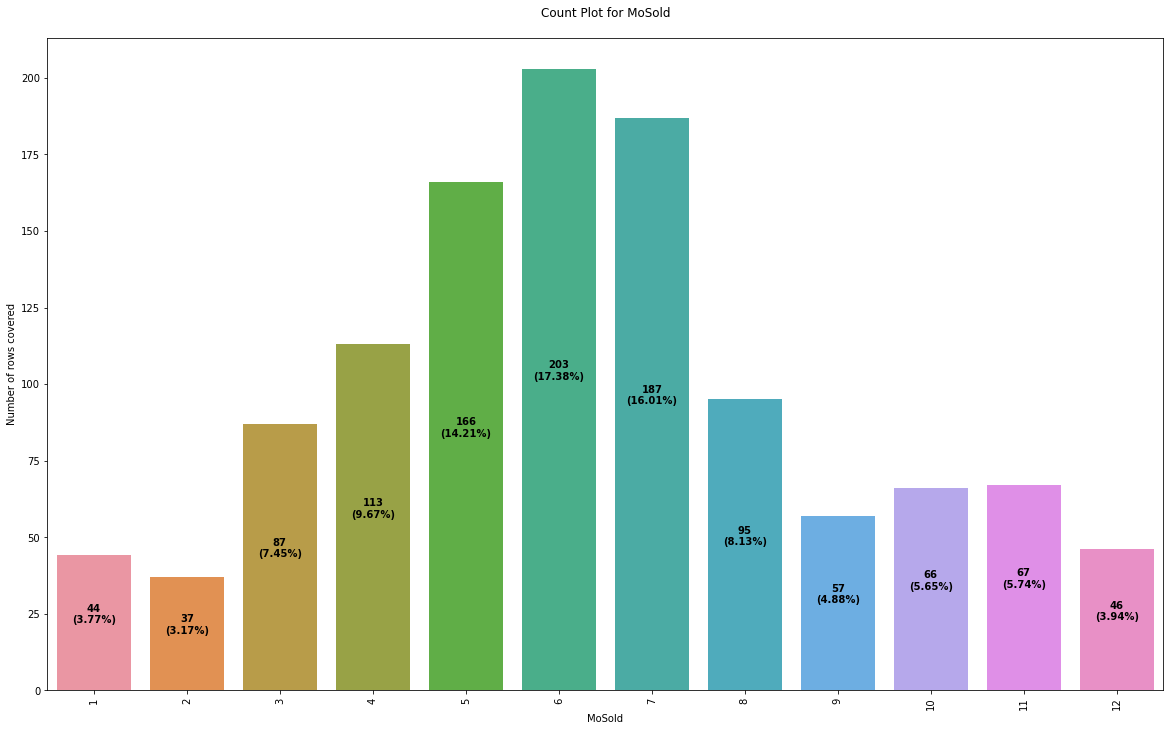

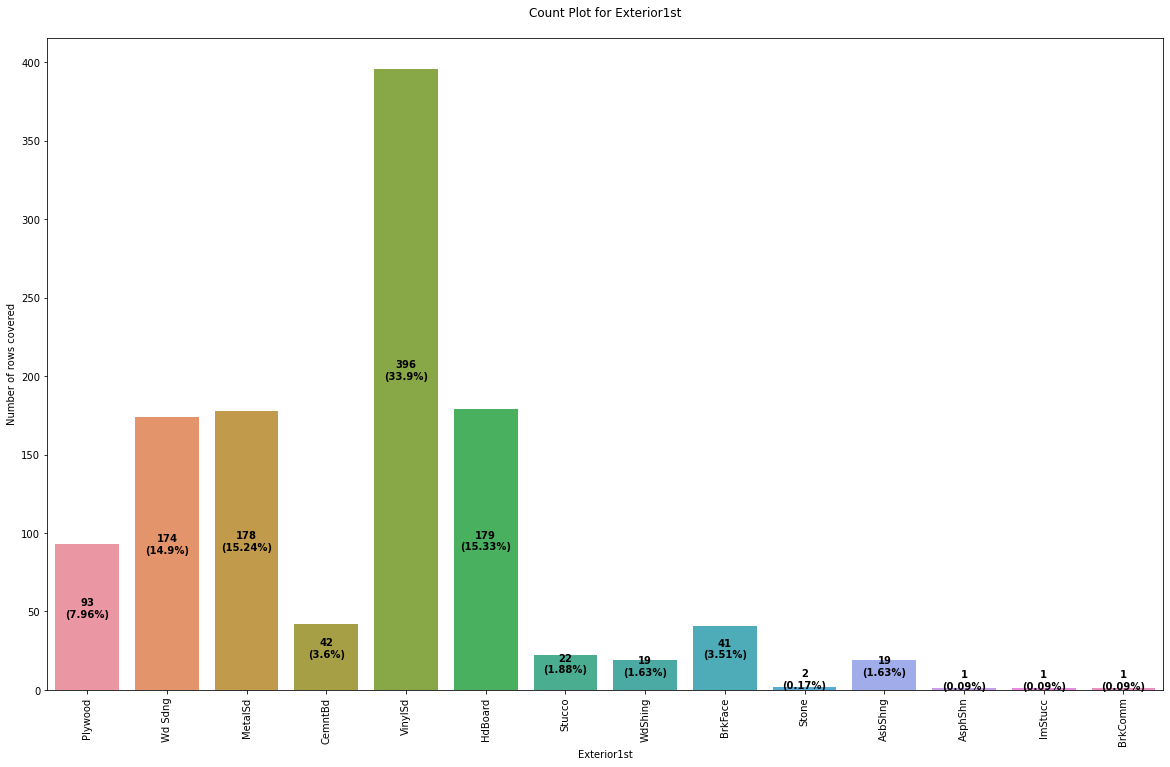

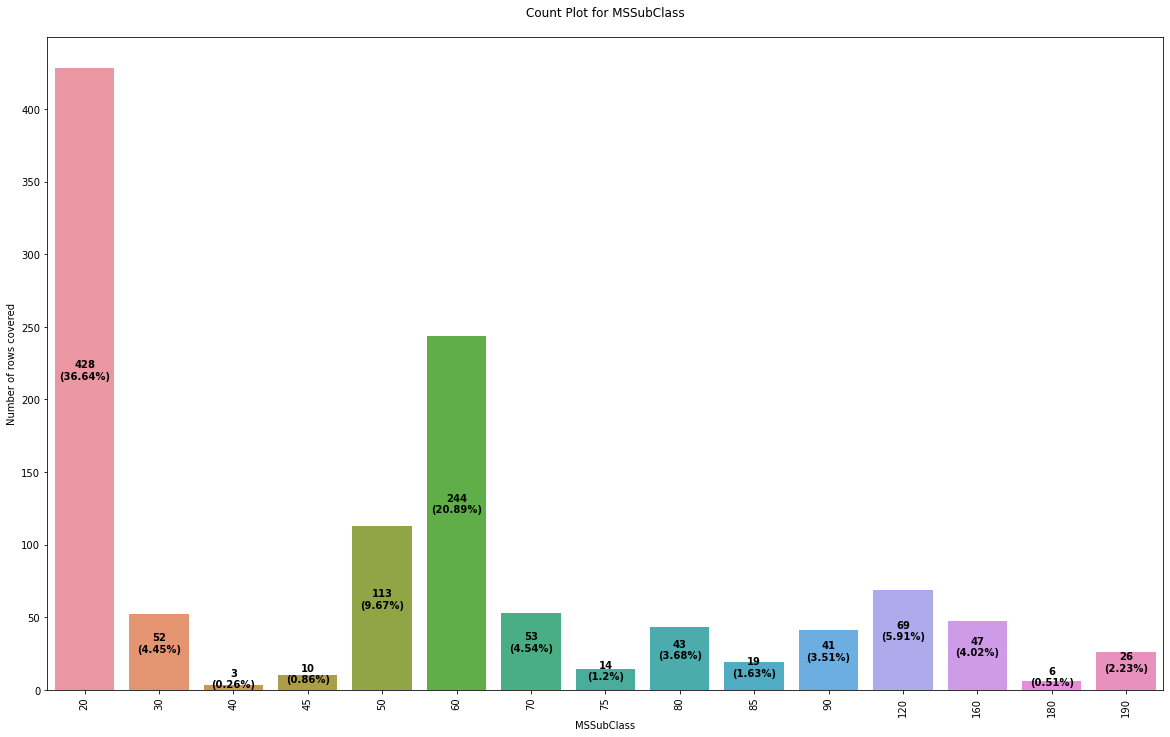

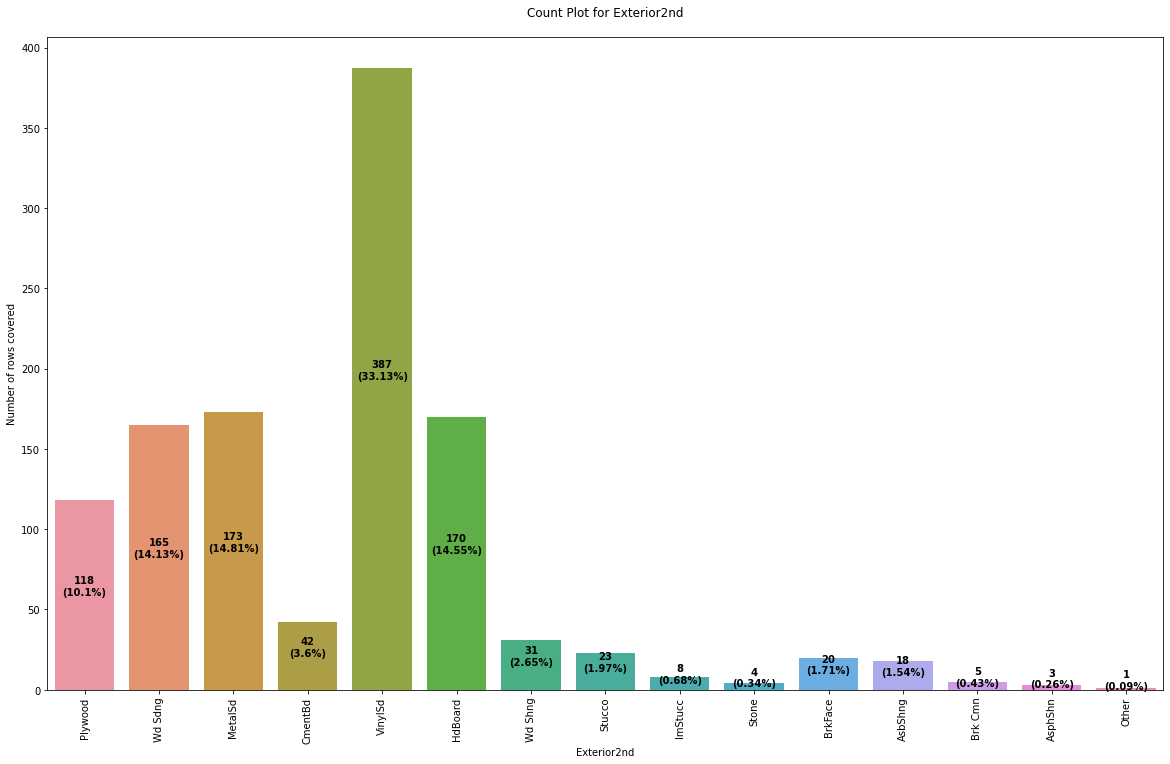

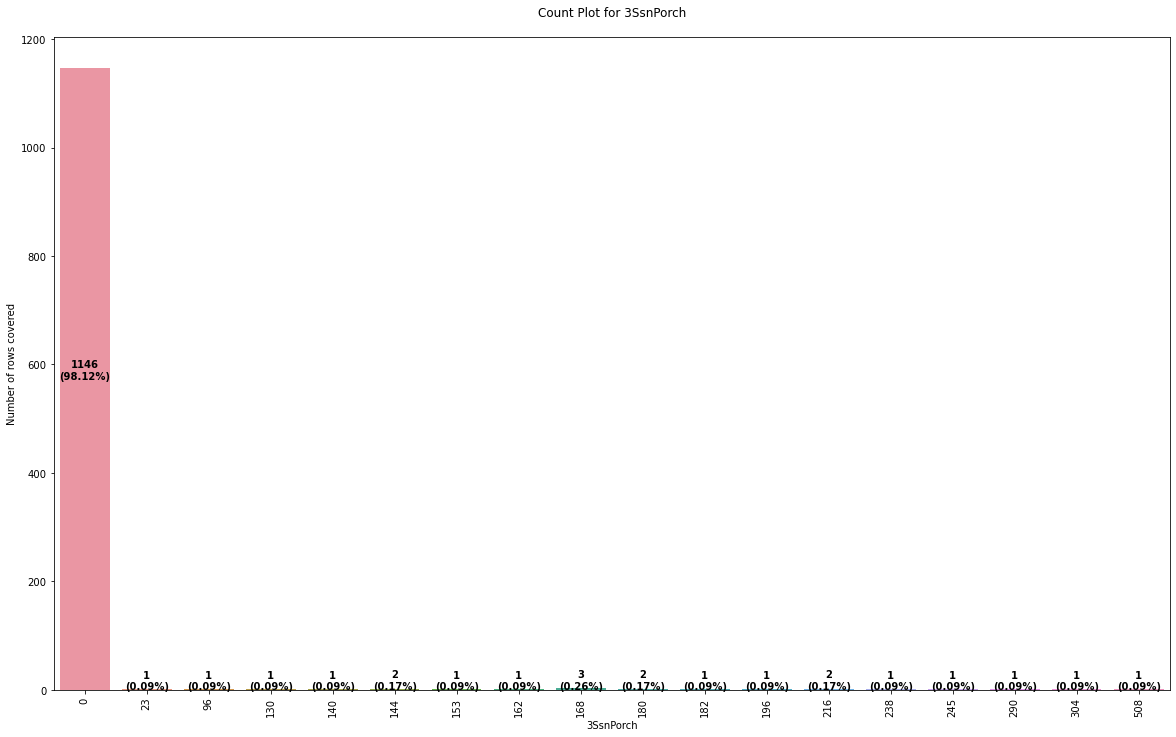

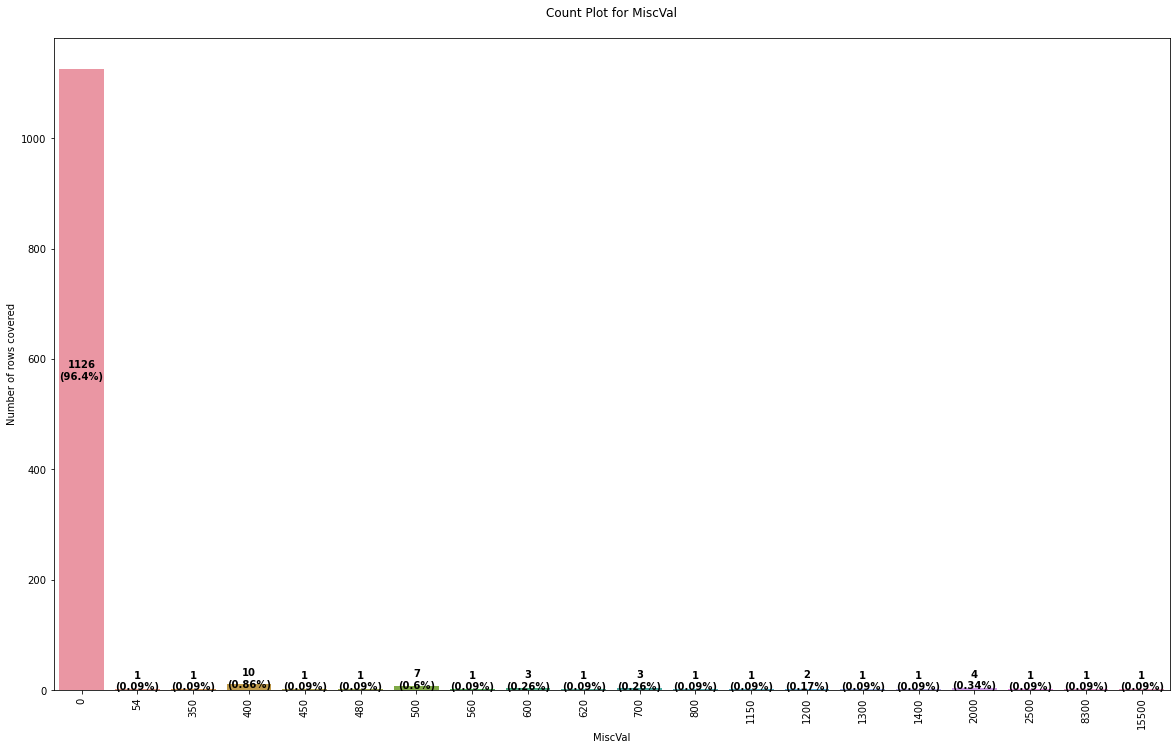

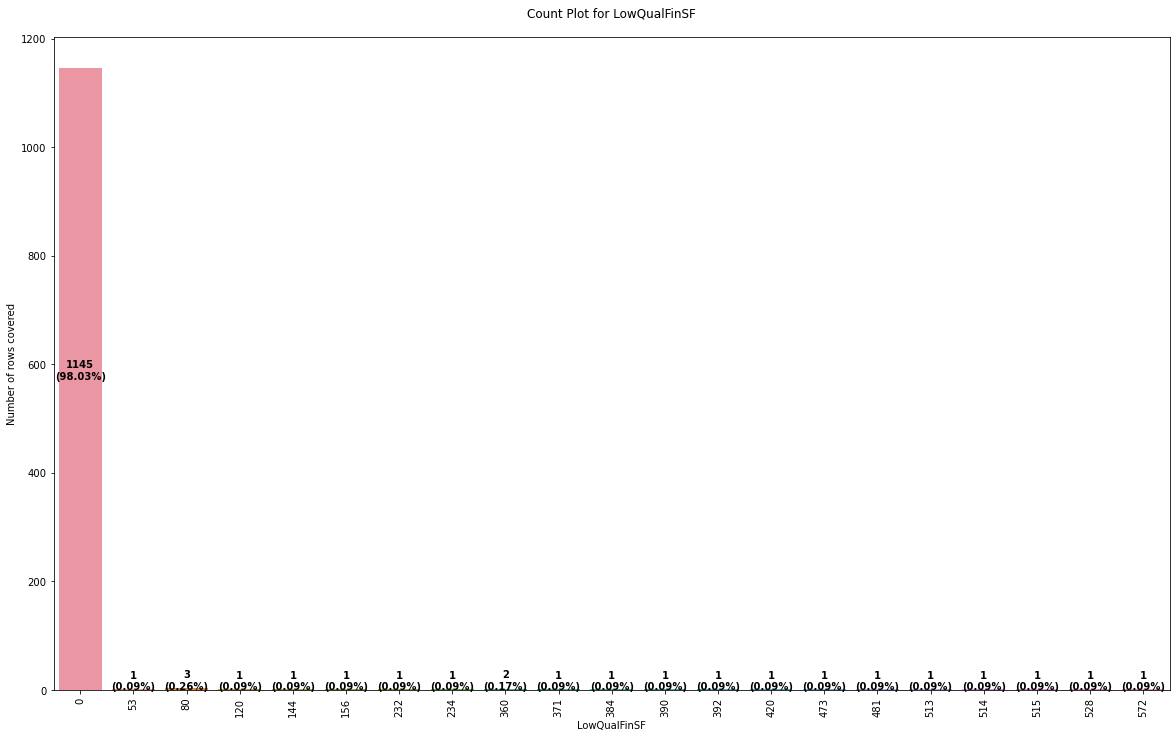

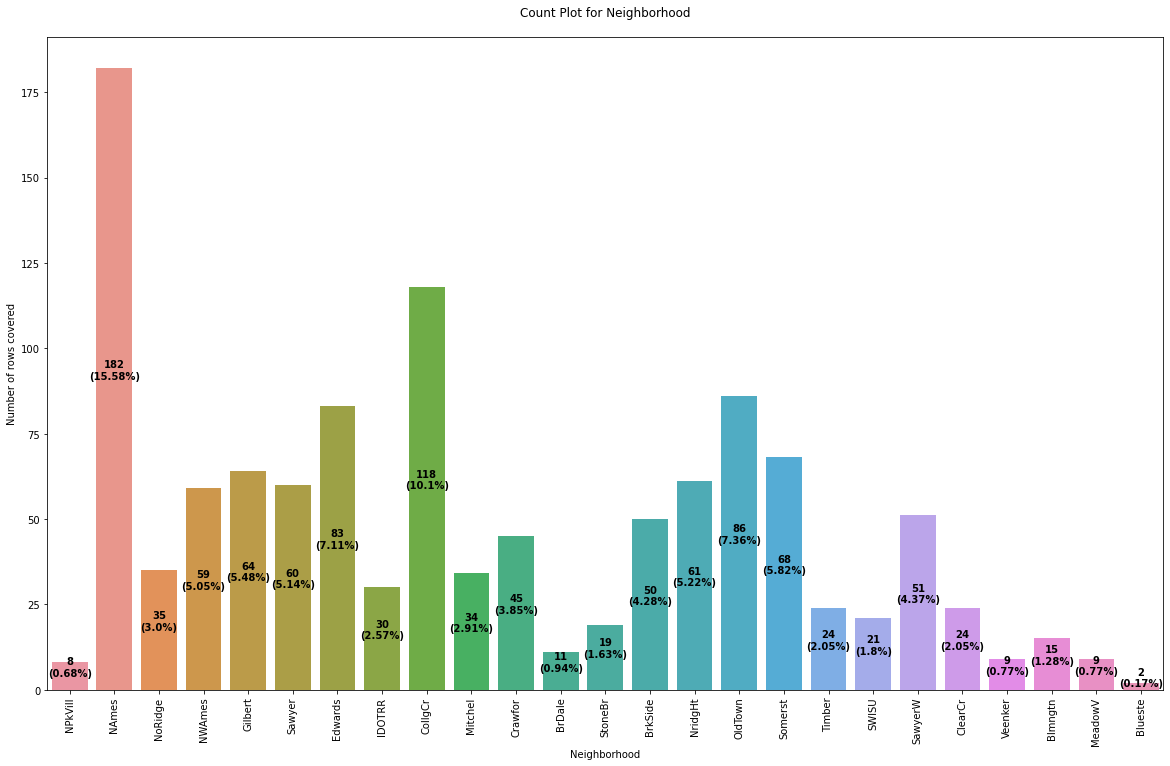

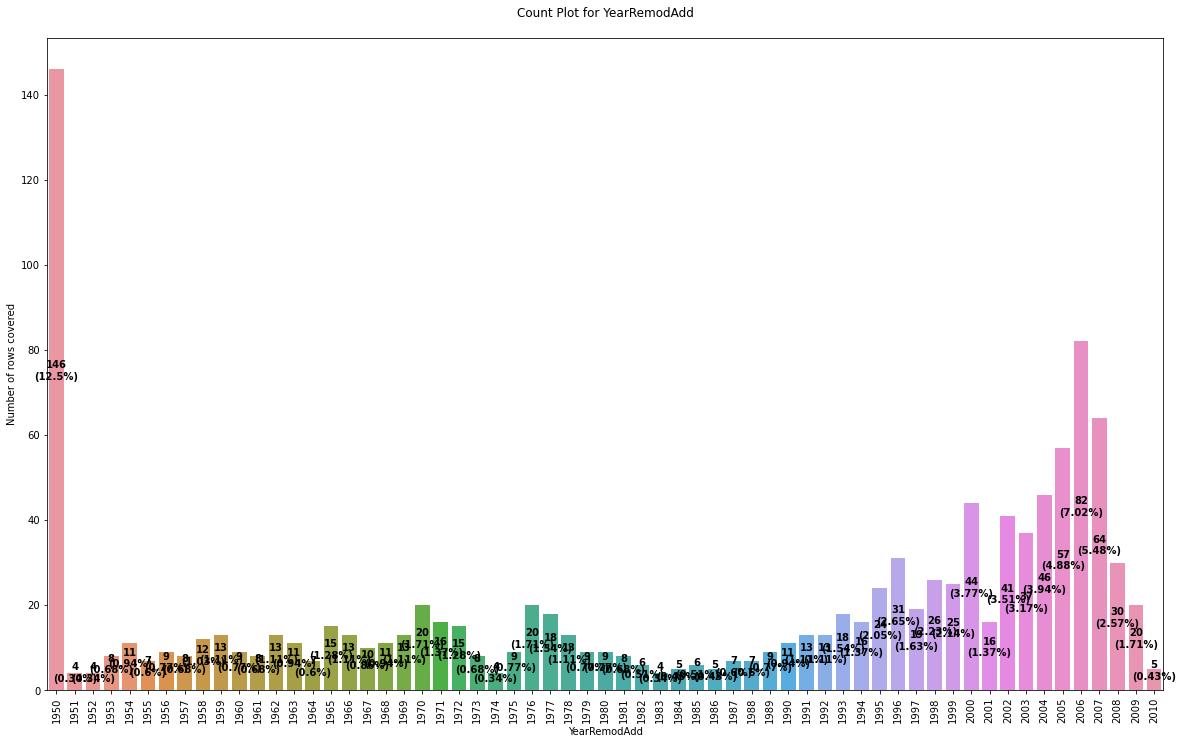

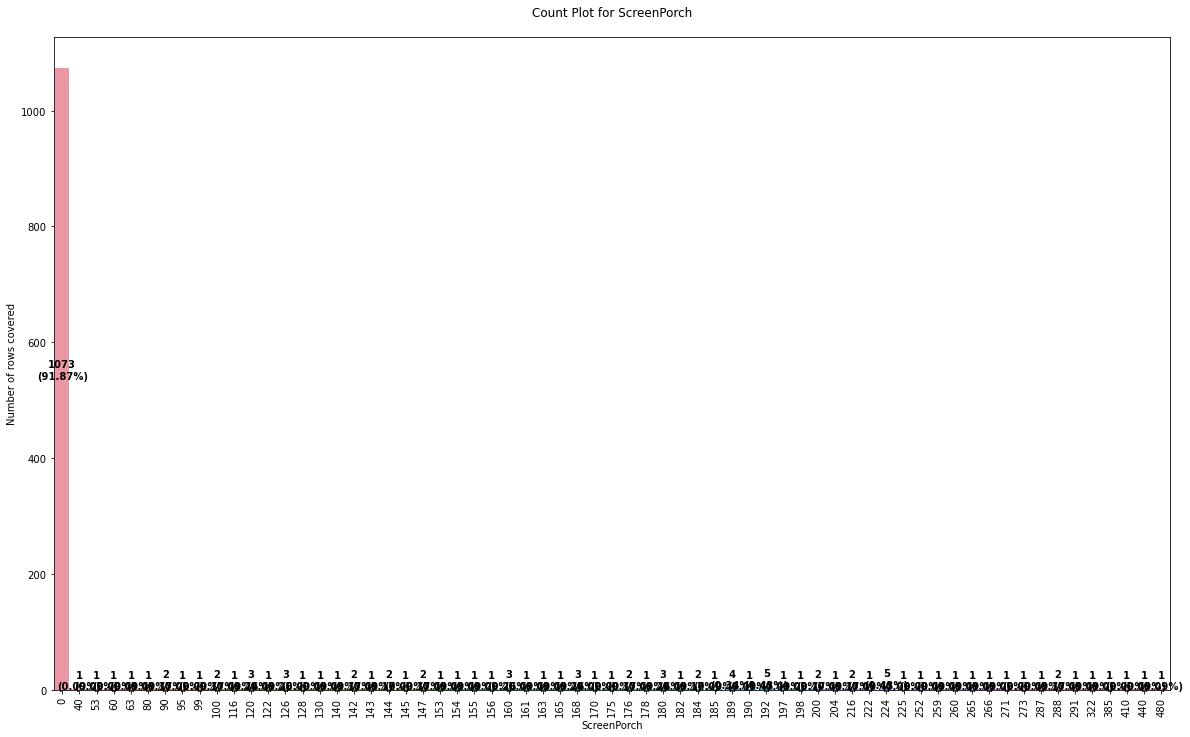

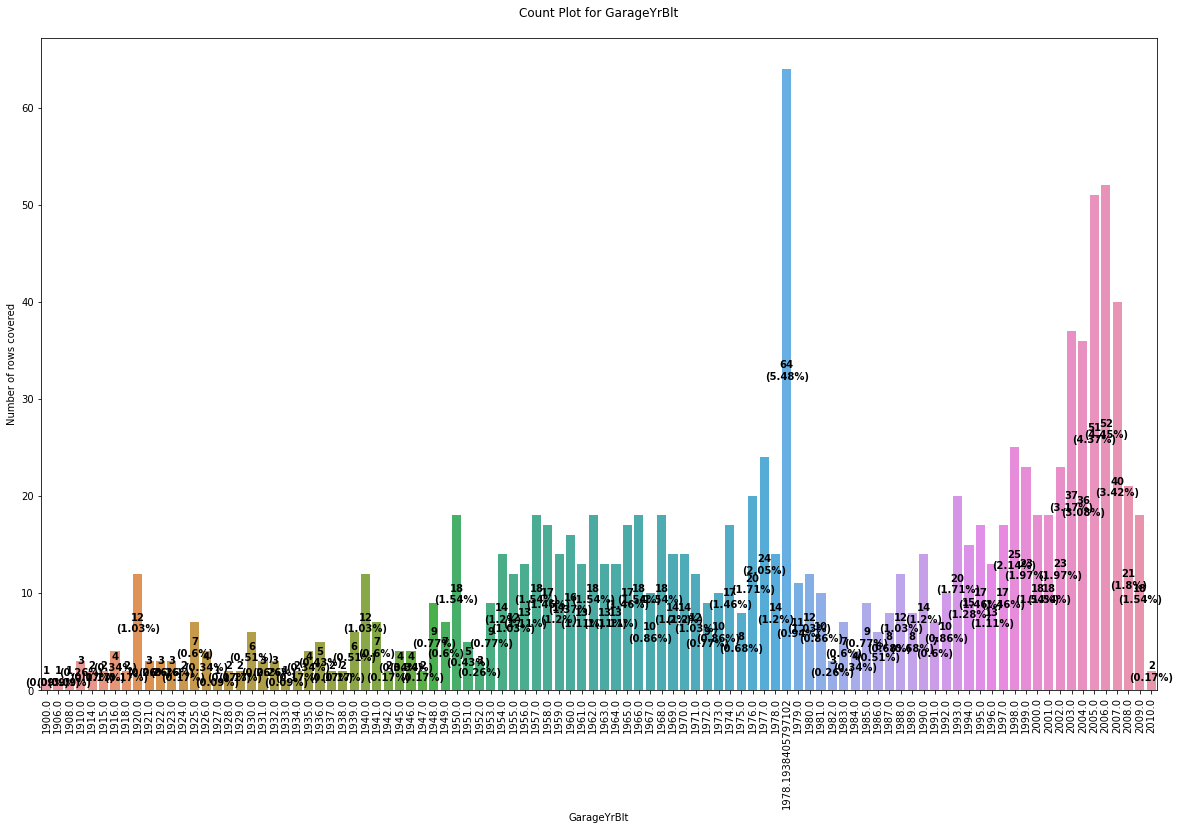

In [25]:
for col in train_df[double]:
    plt.figure(figsize=(20,12))
    col_name = col
    values = train_df[col_name].value_counts()
    index = 0
    ax = sns.countplot(train_df[col_name])

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(train_df[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()

### Observations:

for feature MSSubClass:
•	Maximum number of records are available for 20.
•	Minimum number of records are available for 40.
•	Majority of records are for 20, 60, 50 & 120.
for feature MSZoning:
•	Maximum number of records are available for RL.
•	Minimum number of records are available for C(all).
for feature Street:
•	Maximum number of records are available for Pave.
•	Minimum number of records are available for Grvl.
for feature LotShape:
•	Maximum number of records are available for Reg.
•	Minimum number of records are available for IR3.
•	Majority of records are for Reg & IR1.
for feature LandContour:
•	Maximum number of records are available for Lvl.
•	Minimum number of records are available for Low.
for feature Utilities:
•	All of the records are for AllPub and hence, this feature can be dropped from the dataset as it is of no use.
for feature LotConfig:
•	Maximum number of records are available for Inside.
•	Minimum number of records are available for FR3.
for feature LandSlope:
•	Maximum number of records are available for Gtl.
•	Minimum number of records are available for Sev.
for feature Neighborhood:
•	Maximum number of records are available for NAmes.
•	Minimum number of records are available for Blueste.
•	Majority of records are for NAmes, CollgCr, OldTown, Edwards, Somerst, Gilbert, Sawyer, NWAmes and NridgHt.
for feature Condition1:
•	Most of the records are for Norm.
for feature Condition2:
•	Most of the records are for Norm.
for feature BldgType:
•	Most of the records are for 1Fam.
for feature HouseStyle:
•	Most of the records are for 1Story and 2Story.
for feature OverallQual:
•	Most of the records are for 5, 6, 7, 8, & 4.
for feature OverallCond:
•	Most of the records are for 5, 6, 7.
for feature RoofStyle:
•	Most of the records are for Gable.
for feature RoofMatl:
•	Most of the records are for CompShg.
for feature Exterior1st:
•	Most of the records are for VinylSd, HdBoard, MetalSd, Wd Sdng & Plywood.
for feature Exterior2nd:
•	Most of the records are for VinylSd, HdBoard, MetalSd, Wd Sdng & Plywood.
for feature MasVnrType:
•	Most of the records are for None and BrkFace.
for feature ExterQual:
•	Most of the records are for TA & Gd.
for feature ExterCond:
•	Most of the records are for TA.
for feature Foundation:
•	Most of the records are for CBlock and PConc
for feature BsmtQual:
•	Most of the records are for TA & Gd.
for feature BsmtCond:
•	Most of the records are for TA.
for feature BsmtExposure:
•	Most of the records are for No.
for feature BsmtFinType1:
•	Most of the records are for Unf, GLQ and ALQ.
for feature BsmtFinType2:
•	Most of the records are for Unf.
for feature Heating:
•	Most of the records are for GasA.
for feature HeatingQC:
•	Most of the records are for Ex, TA and Gd.
for feature CentralAir:
•	Most of the records are for Y.
for feature Electrical:
•	Most of the records are for SBrkr.
for feature KitchenQual:
•	Most of the records are for TA & Gd.
for feature Functional:
•	Most of the records are for Typ.
for feature GarageType:
•	Most of the records are for Attchd and Detchd.
for feature GarageFinish:
•	Most of the records are for Unf.
for feature GarageQual:
•	Most of the records are for TA.
for feature GarageCond:
•	Most of the records are for TA.
for feature PavedDrive:
•	Most of the records are for Y.
for feature SaleType:
•	Most of the records are for WD.
for feature SaleCondition:
•	Most of the records are for Normal.

Scatter plot for EnclosedPorch column


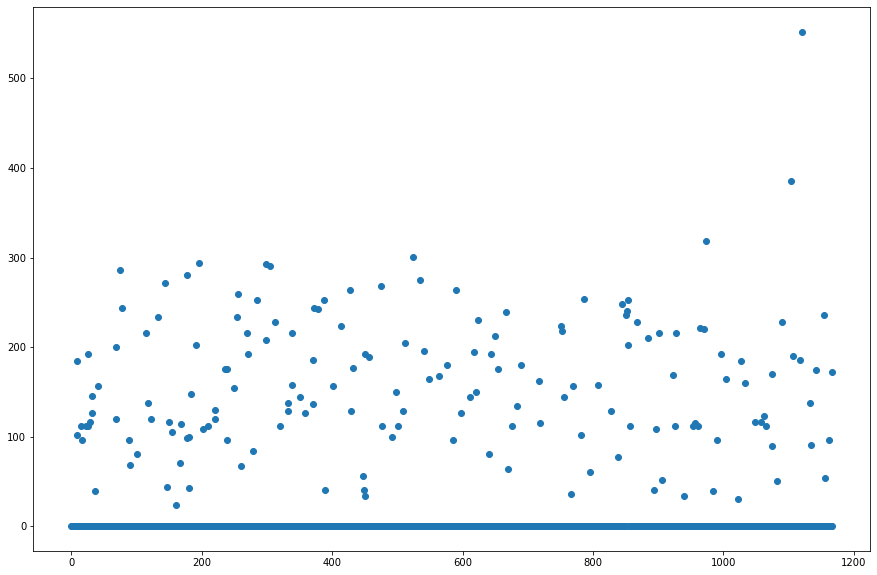

Scatter plot for LotFrontage column


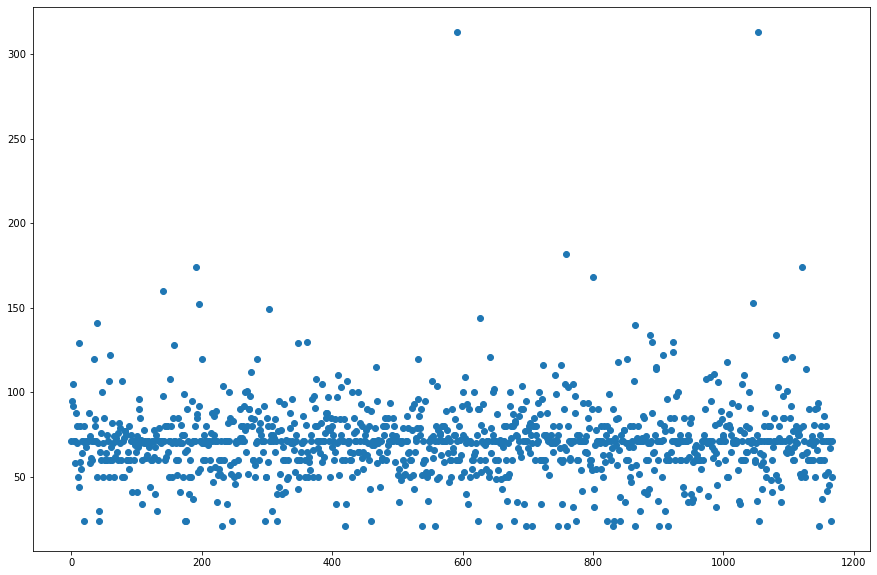

Scatter plot for YearBuilt column


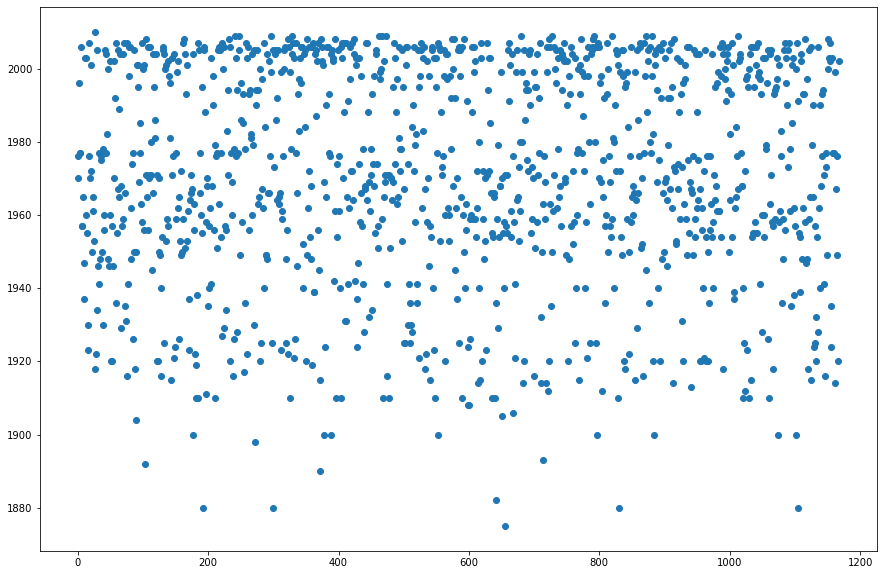

Scatter plot for BsmtFinSF2 column


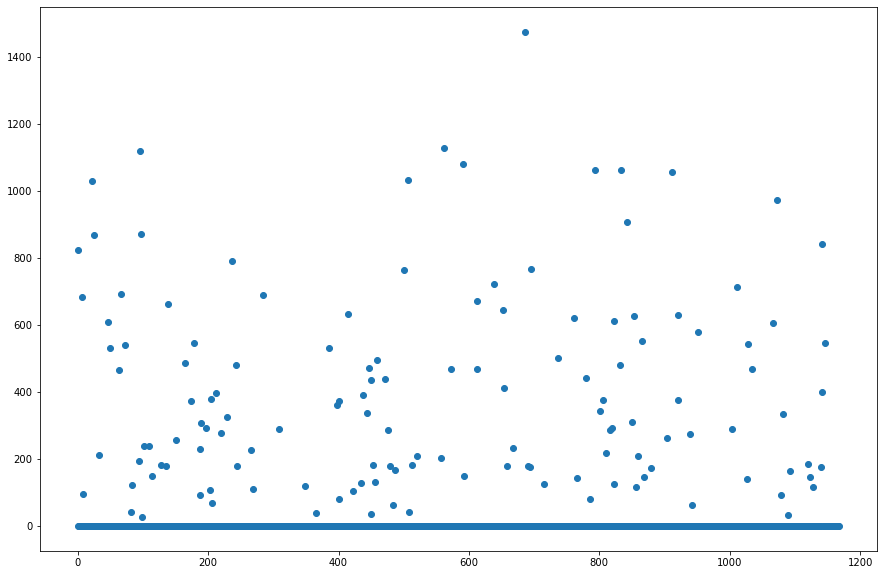

Scatter plot for OpenPorchSF column


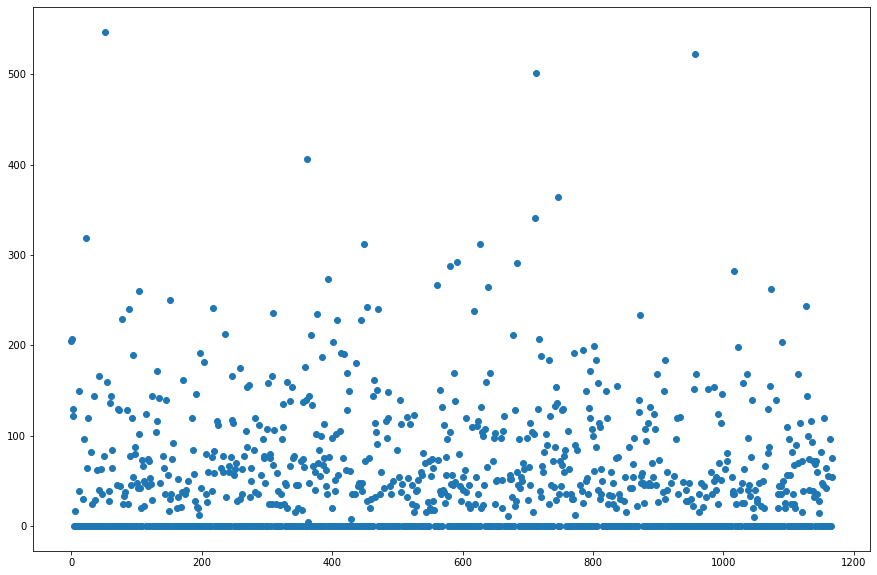

Scatter plot for WoodDeckSF column


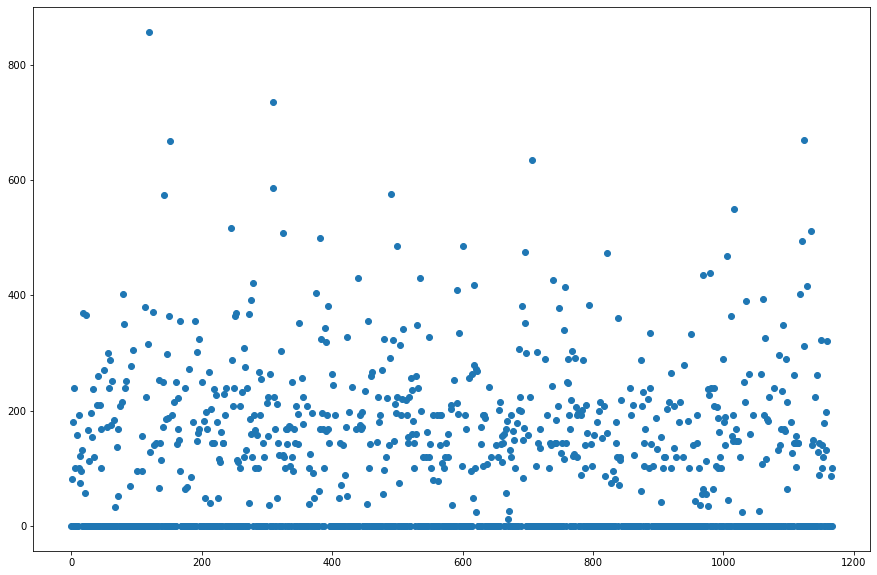

Scatter plot for MasVnrArea column


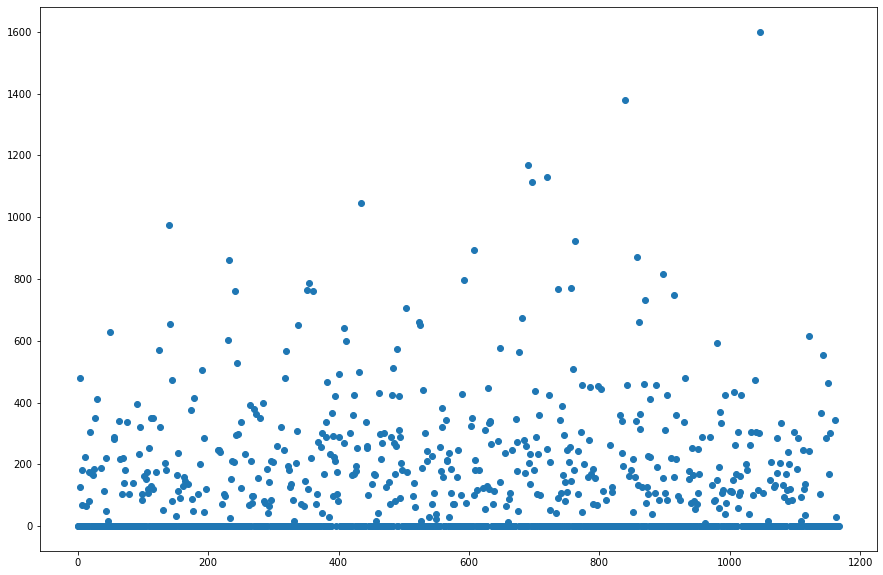

Scatter plot for 2ndFlrSF column


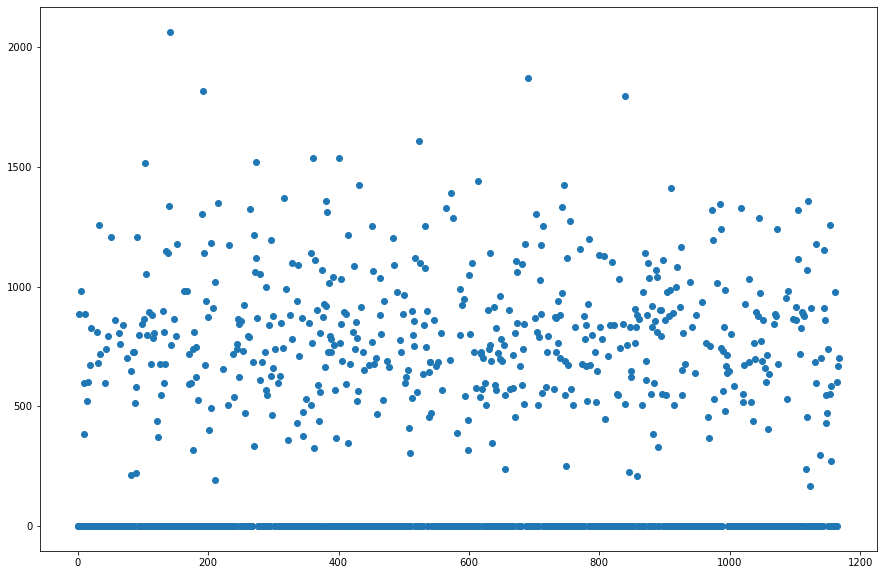

Scatter plot for GarageArea column


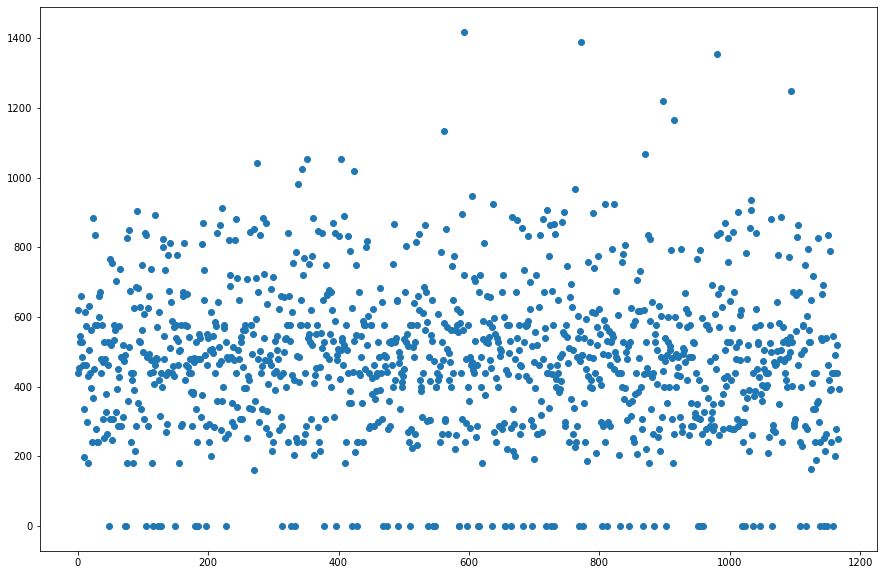

Scatter plot for BsmtFinSF1 column


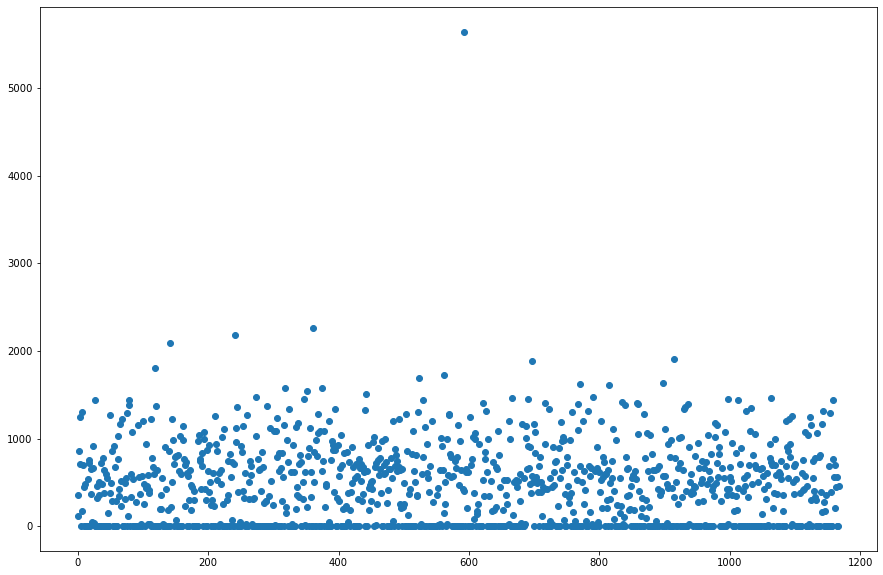

Scatter plot for SalePrice column


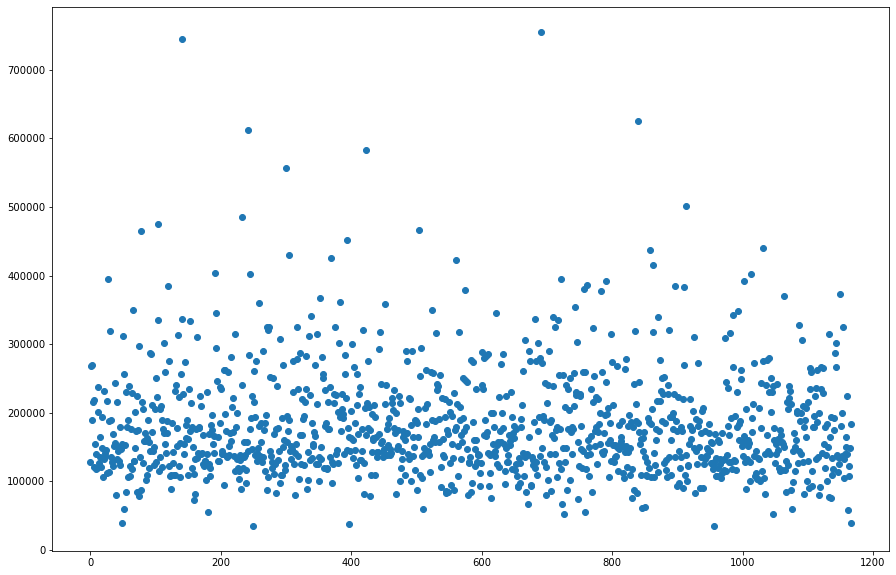

Scatter plot for TotalBsmtSF column


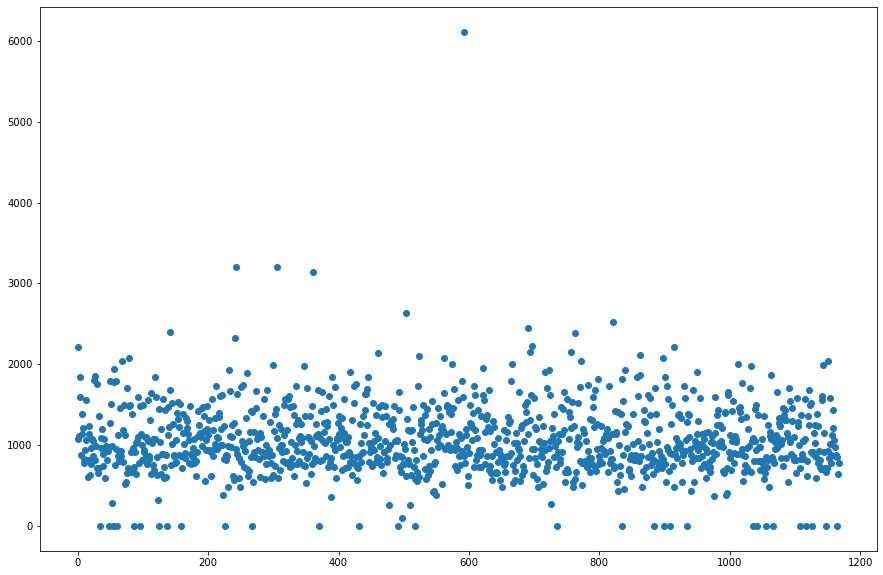

Scatter plot for 1stFlrSF column


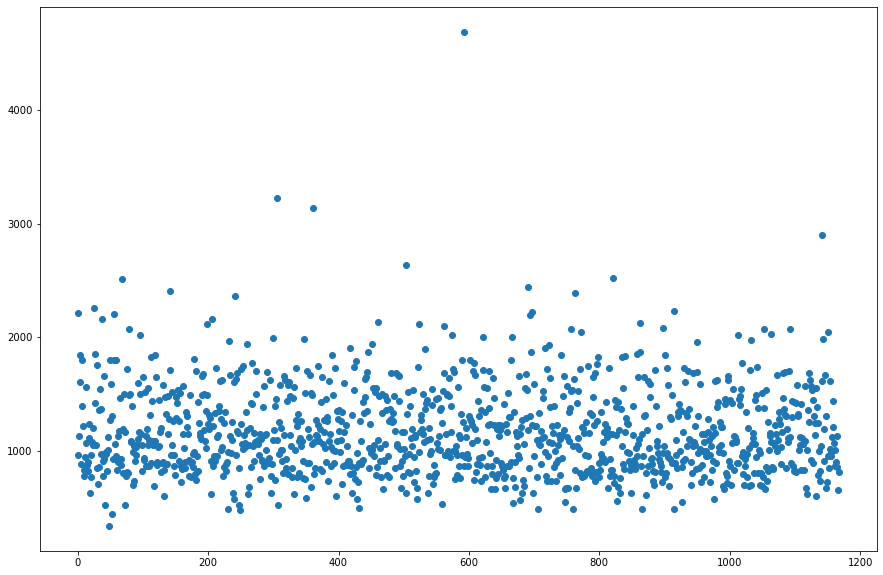

Scatter plot for BsmtUnfSF column


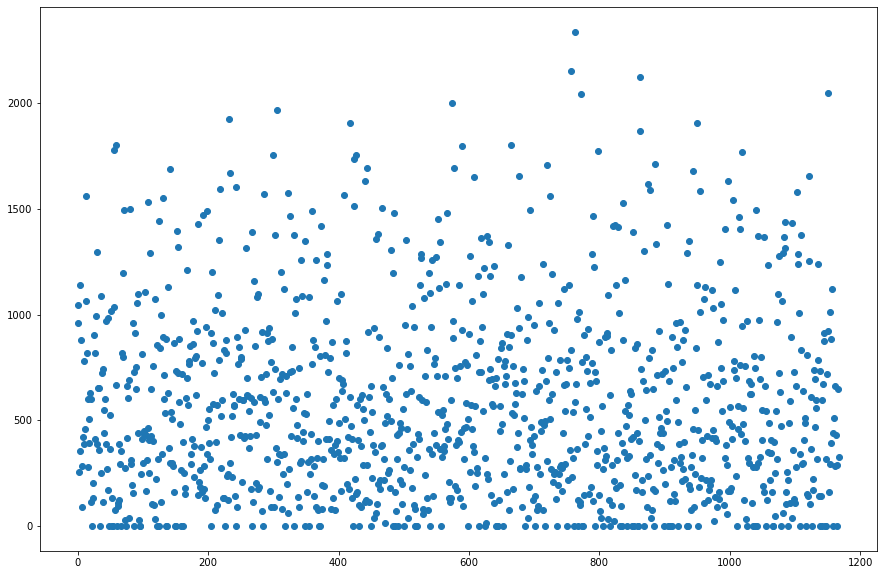

Scatter plot for GrLivArea column


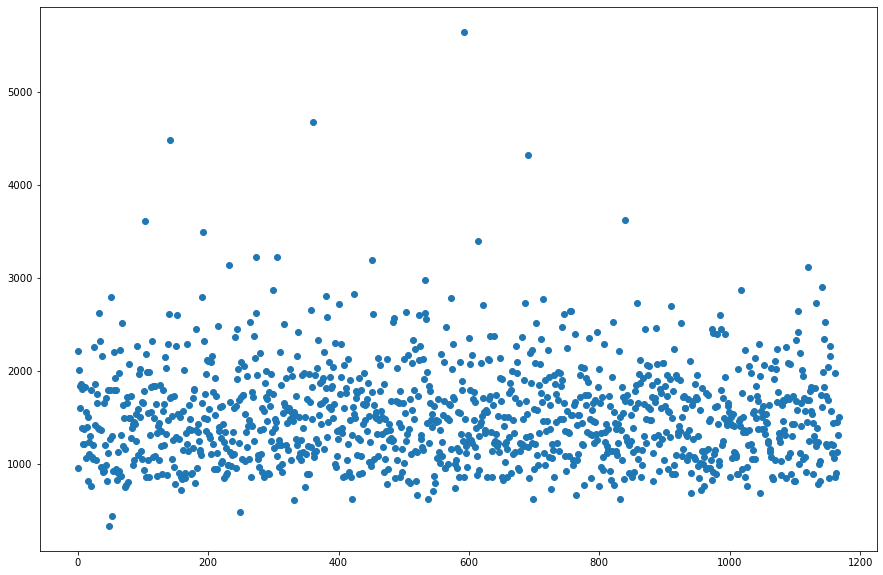

Scatter plot for LotArea column


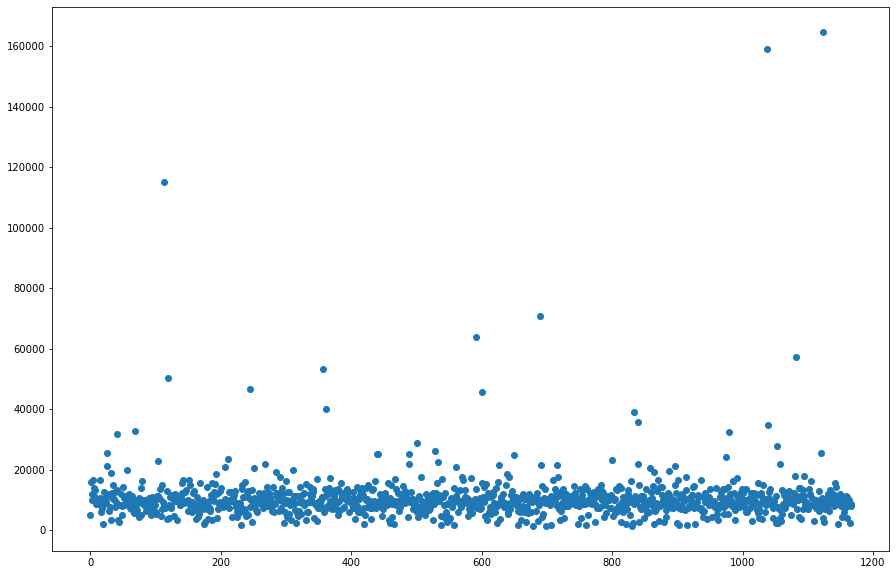

In [28]:
for j in train_df[triple]:
    plt.figure(figsize=(15,10))
    print(f"Scatter plot for {j} column")
    plt.scatter(train_df.index, train_df[j])
    plt.show()

### Observations:

-> Maximum standard deviation of 8957.44 is observed in LotArea column. -> Maximum SalePrice of a house observed is 755000 and minimum is 34900. -> In the columns MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed. -> In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed. -> In the columns MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

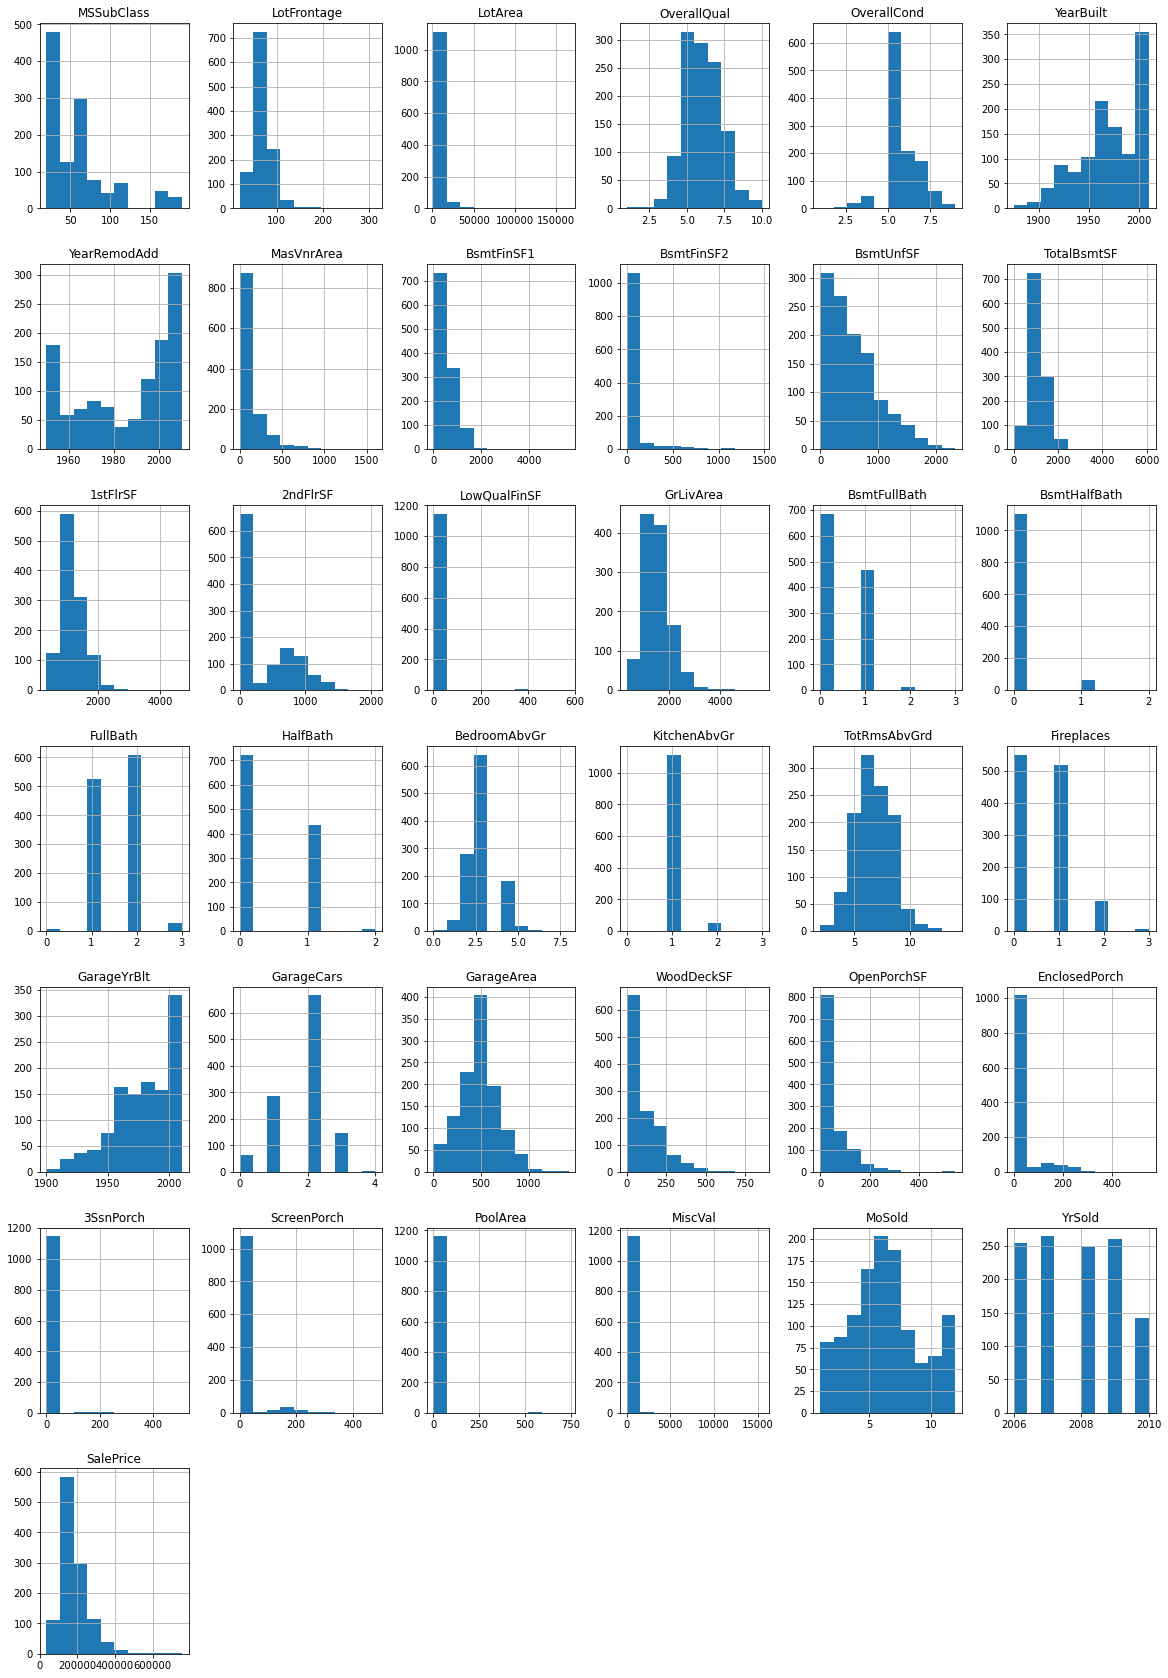

In [29]:
train_df.hist(figsize=(20,30))
plt.show()

### Observations:

-> lotFrontage:Almost all houses have LotFrontage between 20 to 150 -> lotArea:Around 580 house have lot Area between (0-10000)sqft.Very few houses have lot area aound 120000sqft & around 160000sqft -> OverallQual: Rates the overall material and finish of the house-: Around 300 houses sold were in average condition. Only 10-15 houses were in excellent condition. -> YearBuilt: Original construction date-: More number of people have brought the houses build after 1990 -> MasVnrArea: Masonry veneer area in square feet-:50% of houses have Masonry veneer area as '0-50' and out of rest 50% houses most houses have Masonry veneer area 50-1200 -> BsmtFinSF1: Type 1 finished square feet-: Most houses have Type 1 finished square feet area of basement between 0 and 1500 -> BsmtFinSF2: Type 2 finished square feet-: Around 1000 houses have Type 2 finished square feet area of 0
-> BsmtUnfSF: Unfinished square feet of basement area-: Around 130 houses have unfinished basement of area around 100-500 sqft -> 1stFlrSF: First Floor square feet-: Around 280 houses have 1st floor square feet area between 800-1200sqft -> GrLivArea: Above grade (ground) living area square feet-: Most houses have above ground living sq ft area in between 800 to 3000 -> BsmtFullBath: Basement full bathrooms-:50% houses have no full bathrooms in basement and in remaining houses most have 1 full bathroom in basement and very few has 2 full bathrooms -> FullBath: Full bathrooms above grade-:25% houses have 1 full bathrooms above ground and 50% have 2 full bathrooms located above ground and very less have 3 -> HalfBath: Half baths above grade-: around 700 houses have no half bathrooms very few has 1 half bathroom -> Bedroom: Bedrooms above grade (does NOT include basement bedrooms)-: Most houses have 3 bedrooms above ground followed by 2 and 4 -> Kitchen: Kitchens above grade-: Maximum houses have 1 Kitchen. very few have 2 -> TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)-: Around 300 houses have 6 rooms, around 200 have 5, &250 have 7. Very few have 12 & 14 rooms -> Fireplaces: Number of fireplaces-: Most houses have 0 fireplaces followed by 1 -> GarageCars: Size of garage in car capacity-: Most houses have garage with 2 car capcity -> GarageArea: Size of garage in square feet-: Most houses have Garage area in between 200 to 800
-> woodDeckSF: Wood deck area in square feet-: More than 50% of houses have 0 Wood Deck sqft area and rest have in between 0 to 400 -> OpenPorchSF: Open porch area in square feet-:25% of houses have 0 open porch sqft area and rest have in between 0 to 300 -> EnclosedPorch: Enclosed porch area in square feet-: Almost all houses have 0 enclosed porch sqft area -> ScreenPorch: Screen porch area in square feet-: Almost all houses have 0 screen porch area sqft -> Sale Price-: Around 500 houses have sale price in between 100000 to 200000.Very few houses have sale price of 600000 & 700000

# Correlation using a Heatmap
- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

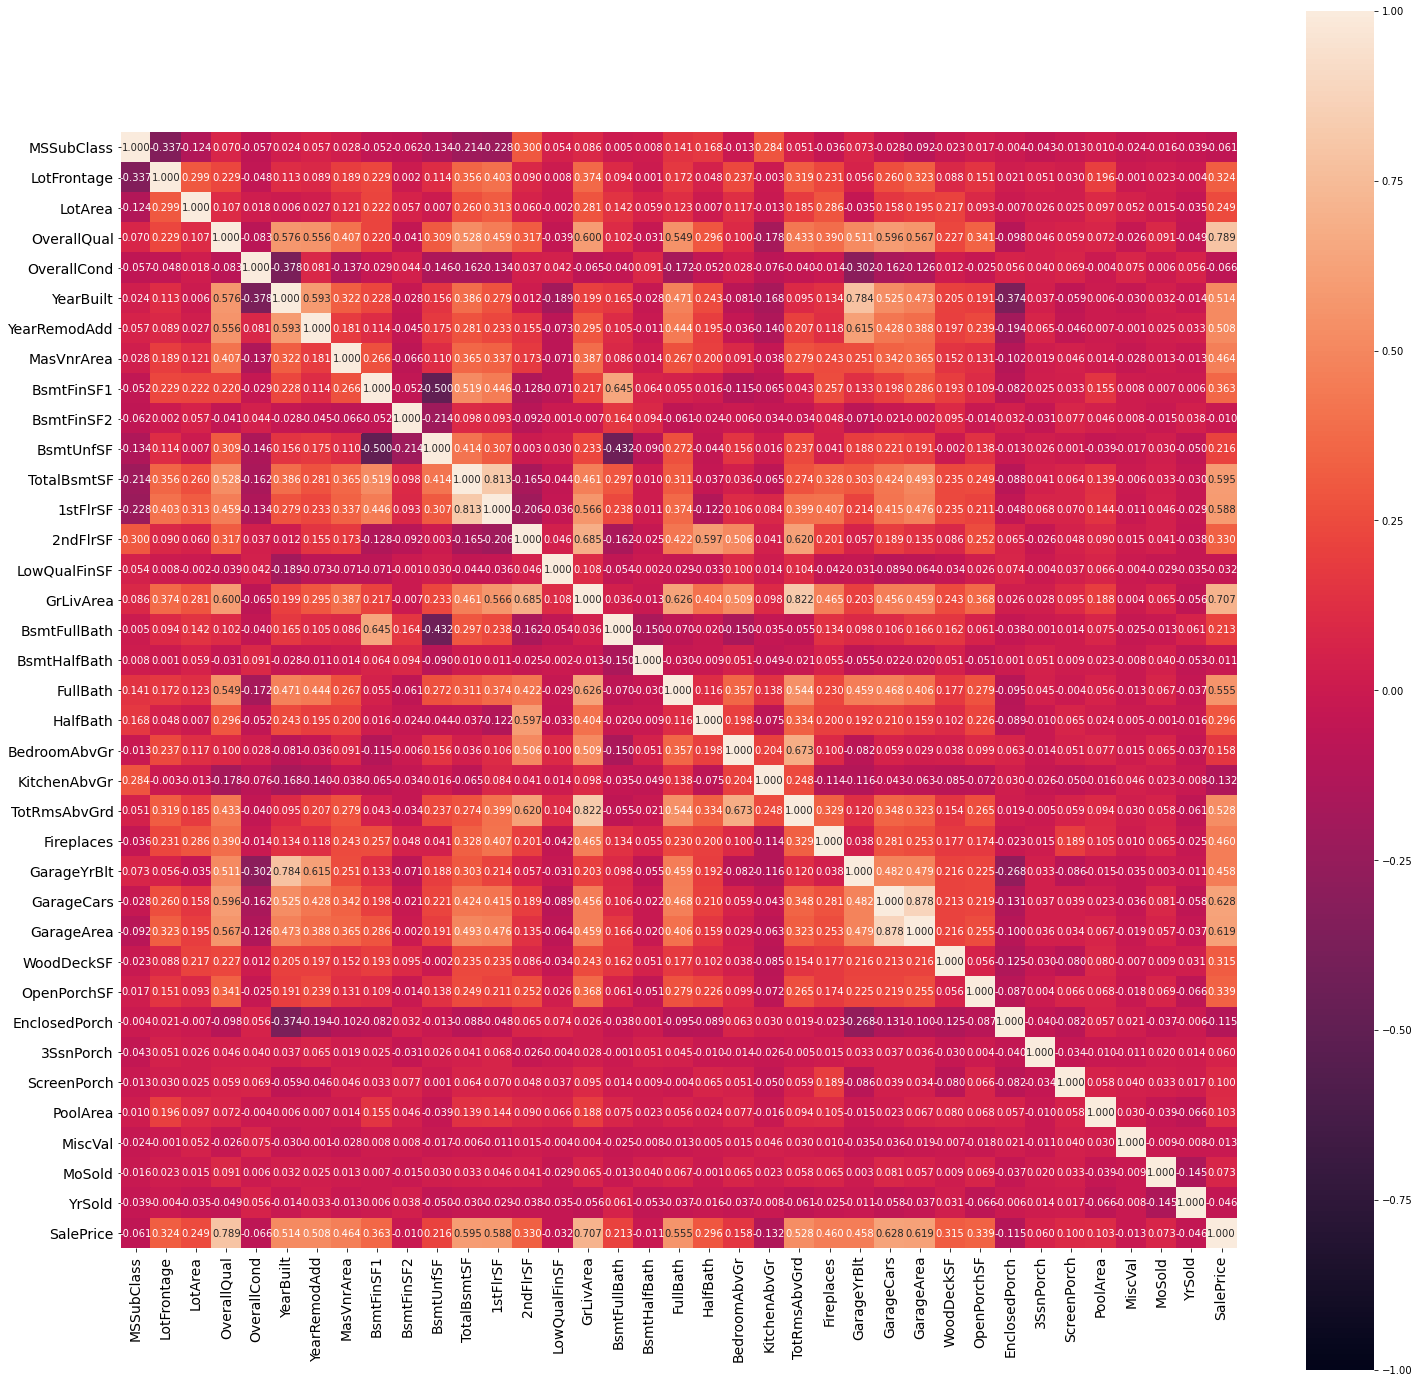

In [30]:
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', annot_kws={'size':10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Observations: 

>'MSSubClass’,'OverallCond’,'OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'KitchenAbvGr’,'YrSold','EnclosedPorch','MiscVal' are negatively correlated with the target column, rest all are positively correlated 

> 'OverallQual' & 'GrLivArea' are highly positively correlated with target column 

>'MSSubClass','OverallCond','OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column

# Encoding the categorical object datatype columns

In [31]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(train_df, object_datatype)
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120       3.0     70.98847     4928     1.0       0.0          3.0   
1          20       3.0     95.00000    15865     1.0       0.0          3.0   
2          60       3.0     92.00000     9920     1.0       0.0          3.0   
3          20       3.0    105.00000    11751     1.0       0.0          3.0   
4          20       3.0     70.98847    16635     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        4.0        0.0          13.0         2.0         2.0       4.0   
1        4.0        1.0          12.0         2.0         2.0       0.0   
2        1.0        0.0          15.0         2.0         2.0       0.0   
3        4.0        0.0          14.0         2.0         2.0       0.0   
4        2.0        0.0          14.0         2.0         2.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0            6            5       1976          1976        1.0   
1         2.0            8            6       1970          1970        0.0   
2         5.0            7            5       1996          1997        1.0   
3         2.0            6            6       1977          1977        3.0   
4         2.0            6            7       1977          2000        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       1.0          8.0          9.0         2.0         0.0        3.0   
1       5.0         12.0         13.0         2.0         0.0        2.0   
2       1.0          7.0          7.0         2.0         0.0        2.0   
3       1.0          8.0          9.0         1.0       480.0        3.0   
4       1.0          4.0          4.0         3.0       126.0        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        4.0         1.0       2.0       3.0           3.0           0.0   
1        2.0         2.0       3.0       1.0           1.0           0.0   
2        4.0         2.0       2.0       3.0           0.0           2.0   
3        4.0         1.0       2.0       3.0           3.0           1.0   
4        4.0         1.0       2.0       3.0           3.0           0.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         120           5.0           0        958         1078      1.0   
1         351           4.0         823       1043         2217      1.0   
2         862           5.0           0        255         1117      1.0   
3         705           5.0           0       1139         1844      1.0   
4        1246           5.0           0        356         1602      1.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        4.0         1.0         4.0       958         0             0   
1        0.0         1.0         4.0      2217         0             0   
2        0.0         1.0         4.0      1127       886             0   
3        0.0         1.0         4.0      1844         0             0   
4        2.0         1.0         4.0      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1          3.0             5         6.0           1   
1             1          2.0             8         6.0           1   
2             1          3.0             8         6.0           1   
3             1          3.0   

I defined a function to apply `OrdinalEncoder` on my feature columns to convert the object datatype columns to numeric format.

In [33]:
print("Shape of our data frame afterencoding -> {} Rows , {} columns\n".format(df.shape[0], df.shape[1]))

Shape of our data frame afterencoding -> 1168 Rows , 74 columns



Checking the number of rows and columns after applying the encoding technique on them.

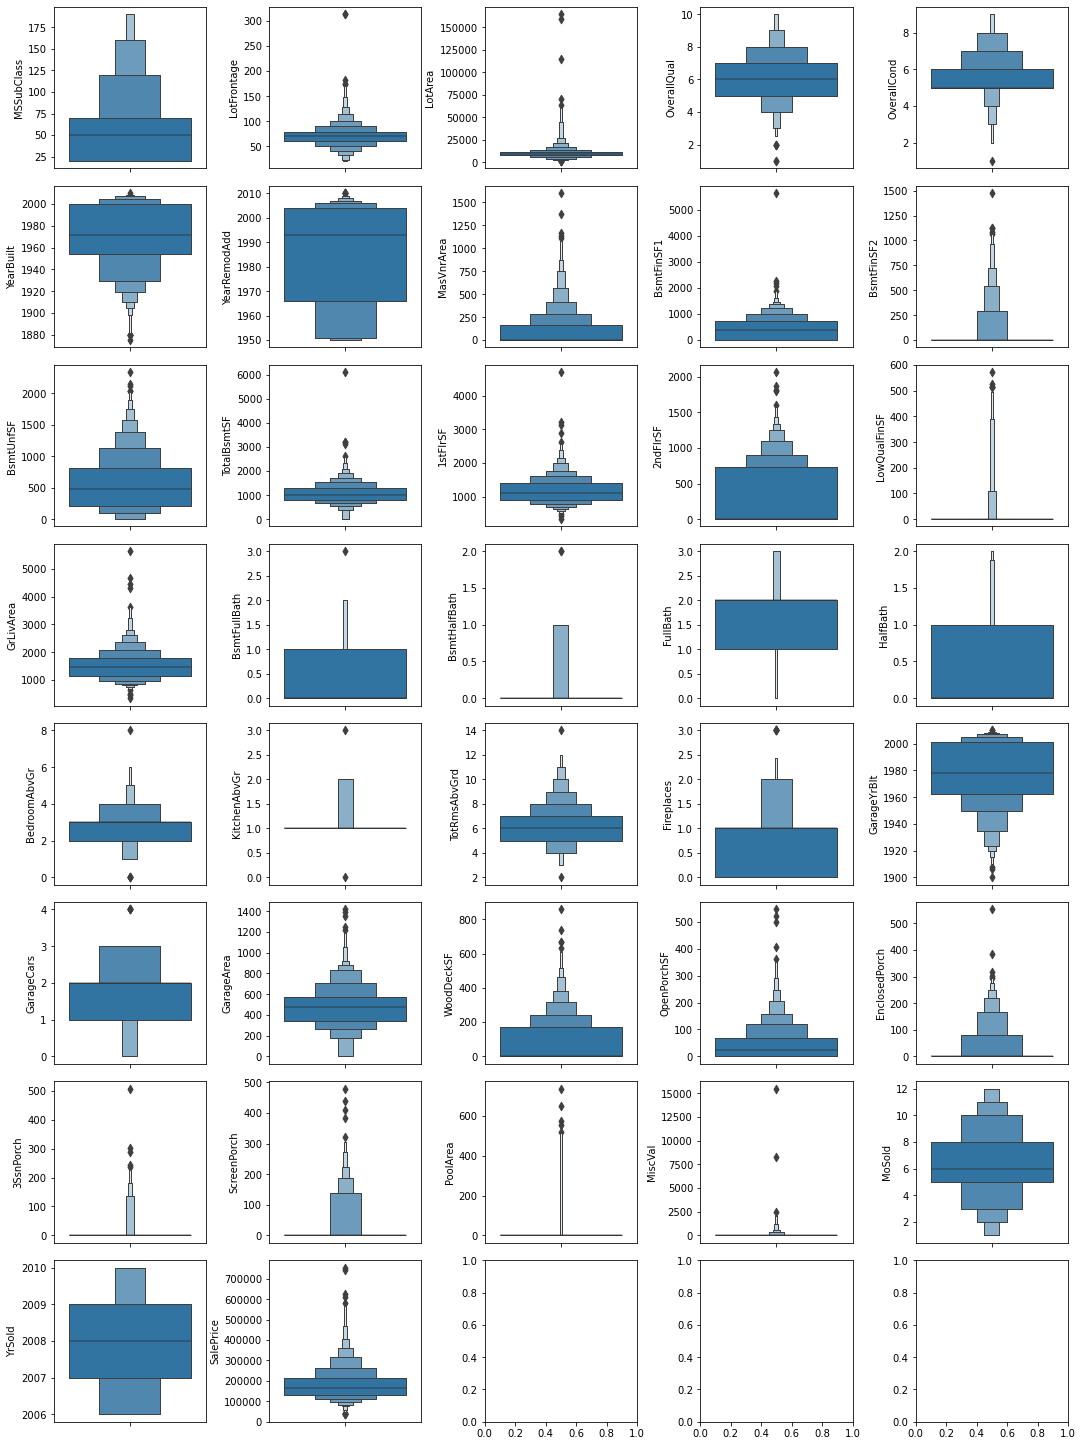

In [34]:
fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.boxenplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Using the boxen plot we are able to see some outliers details however when I tried to remove outliers I was losing around 58% of data and therefore I decided on retaining the information that I have left with me.

In [35]:
df.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
Heating          10.103609
H

With the `skew` method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

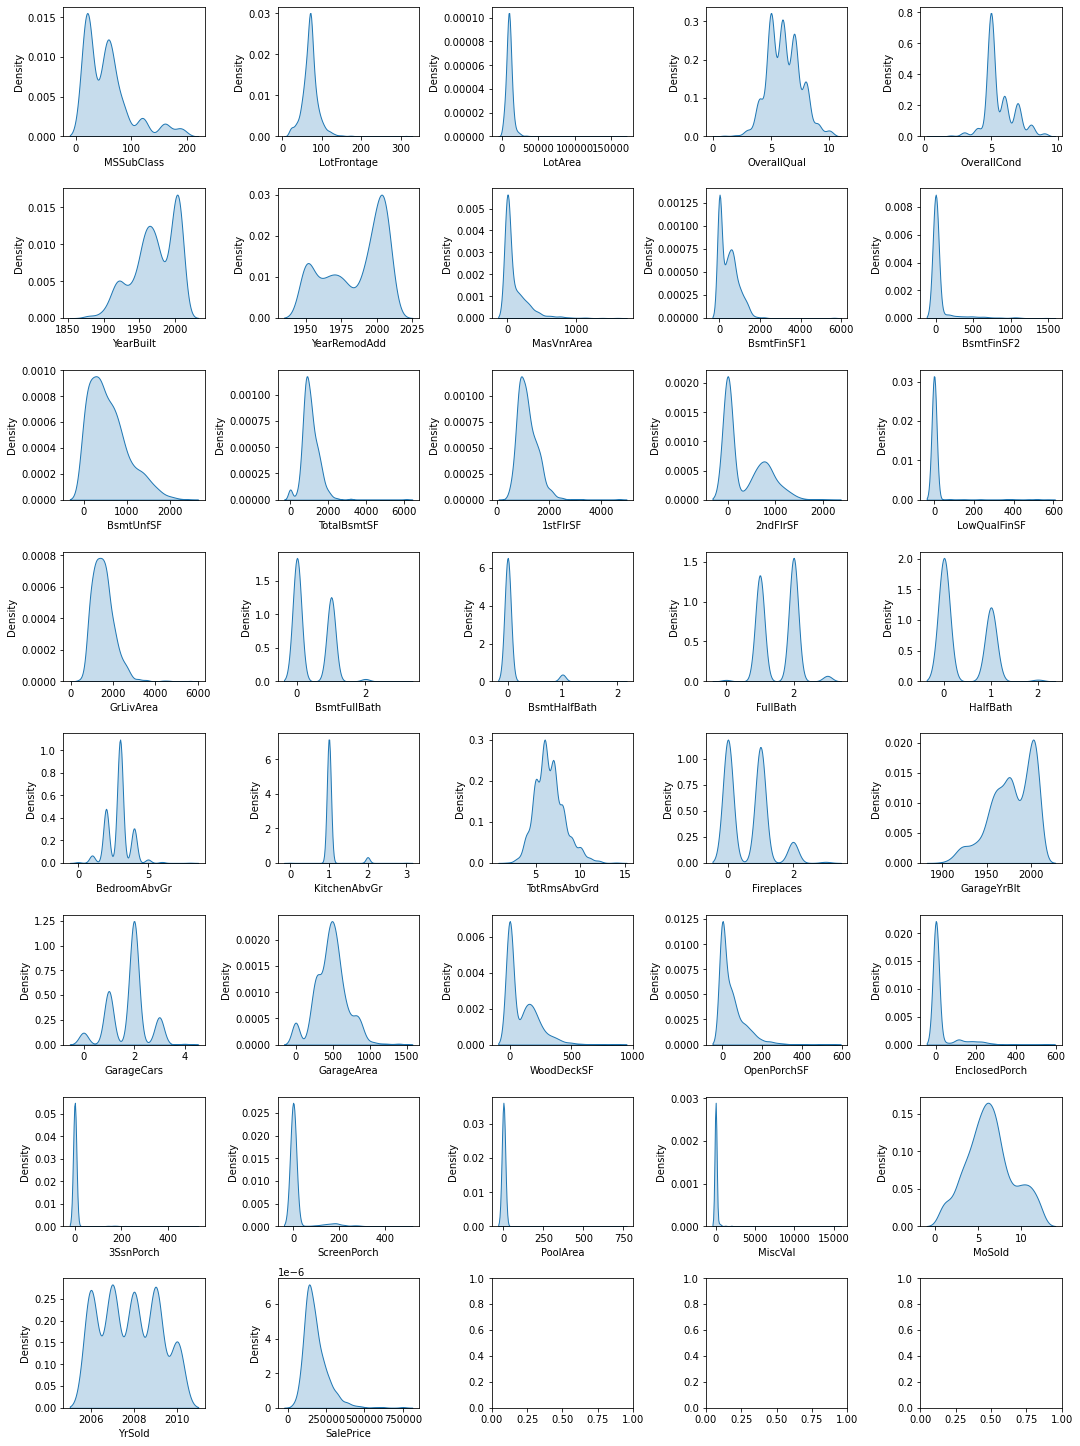

In [36]:
fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Using the above distribution plot we are able to see some skewness present in few of the columns that will need to be handled. However right now I am trying to choose the outlier value retained data to work upon my machine learning model.

# Correlation Bar Plot comparing features with our label

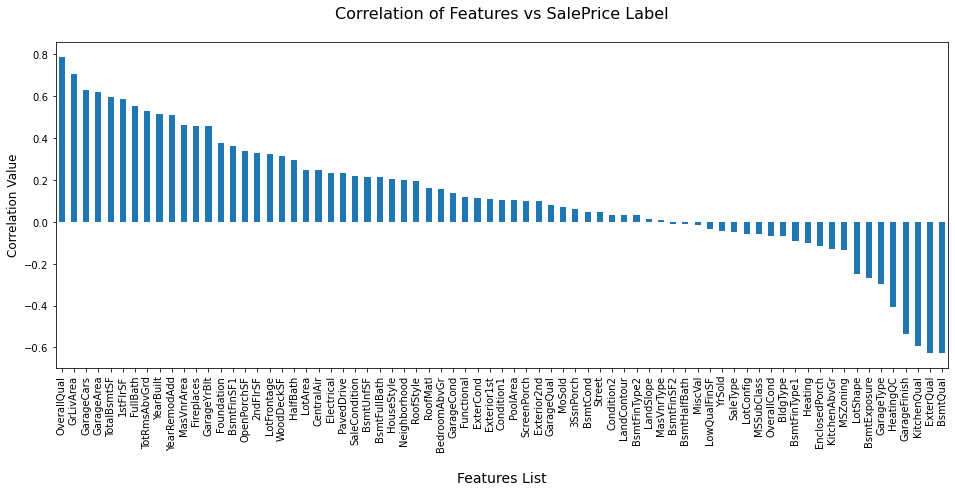

In [37]:
df_corr = df.corr()
plt.figure(figsize=(16,6))
df_corr['SalePrice'].sort_values(ascending=False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs SalePrice Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

### Observations:

> SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea. 

> SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [38]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Feature Scaling

In [39]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.000000 -0.620616  0.058621 -1.373107   
1   -0.877042 -0.021646     1.070631  0.600903  0.058621 -1.373107   
2    0.077095 -0.021646     0.936867 -0.063075  0.058621 -1.373107   
3   -0.877042 -0.021646     1.516514  0.141424  0.058621 -1.373107   
4   -0.877042 -0.021646     0.000000  0.686902  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0  2.985495   -0.549930    -0.075169    -0.530217   0.168236     -0.421565   
1 -0.403288   -0.549930     1.364138     0.359572  -0.030885     -0.710356   
2 -0.403288    1.030838     0.644484    -0.530217   0.831975      0.589202   
3 -0.403288   -0.549930    -0.075169     0.359572   0.201423     -0.373434   
4 -0.403288   -0.549930    -0.075169     1.249361   0.201423      0.733598   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0  -0.483544 -0.134573    -0.212927    -0.104890    0.395209   -0.562238   
1  -1.685203  6.090408     1.079014     1.050880    0.395209   -0.562238   
2  -0.483544 -0.134573    -0.535912    -0.682775    0.395209   -0.562238   
3   1.919773 -0.134573    -0.212927    -0.104890   -1.241686    2.075571   
4  -0.483544 -0.134573    -1.504868    -1.549602    2.032104    0.130186   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
1  -0.759266  -2.318331    0.852451  0.836731 -2.672114     -1.113129   
2  -0.759266   0.369322    0.852451 -0.329500  0.293234     -1.987463   
3   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
4  -0.759266   0.369322   -0.557836 -0.329500  0.293234      0.635539   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -1.523529   -0.702161      0.310141   -0.285392   0.864410     0.038239   
1     -1.523529   -0.202665     -0.771186    4.749787   1.053642     2.614679   
2     -0.434828    0.902279      0.310141   -0.285392  -0.700654     0.126458   
3     -0.979178    0.562795      0.310141   -0.285392   1.267363     1.770946   
4     -1.523529    1.732609      0.310141   -0.285392  -0.475801     1.223537   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.11909   1.390230    0.267506    0.299036 -0.541850 -0.793674   
1 -0.11909  -0.897602    0.267506    0.299036  2.678144 -0.793674   
2 -0.11909  -0.897602    0.267506    0.299036 -0.109619  1.222216   
3 -0.11909  -0.897602    0.267506    0.299036  1.724166 -0.793674   
4 -0.11909   0.246314    0.267506    0.299036  1.105232 -0.793674   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.125418  -1.074363     -0.816112     -0.235213  0.793082 -0.770138   
1     -0.125418   1.310934      1.101833     -0.235213  0.793082 -0.770138   
2     -0.125418   0.924437      1.101833     -0.235213  0.793082  1.211186   
3     -0.125418   0.604250     -0.816112     -0.235213  0.793082 -0.770138   
4     -0.125418   0.145757     -0.816112      3.991376  0.793082 -0.770138   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0     -1.082679     -0.209883     0.806154     -0.965583    0.261146   
1      1.365664     -0.209883    -0.394851      0.911999    0.261146   
2      0.141492     -0.209883     0.806154      0.911999    0.261146   
3      0.141492     -0.209883     0.806154      0.286138    0.261146   
4      0.141492  

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding the best random state for building Regression Models

In [40]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.8853029468246922 on Random State 340


Here we see that out of the random state value ranging from 1 to 1000 the best random state number found is 340 and we will use this in our ML models.

# Feature importance dataframe

In [41]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                 
OverallQual         0.583
GrLivArea           0.098
1stFlrSF            0.038
TotalBsmtSF         0.030
BsmtFinSF1          0.023
GarageArea          0.021
MasVnrArea          0.020
2ndFlrSF            0.020
BsmtQual            0.014
LotArea             0.012
GarageCars          0.010
Neighborhood        0.009
FullBath            0.009
YearRemodAdd        0.009
LotFrontage         0.008
YearBuilt           0.008
GarageYrBlt         0.006
KitchenQual         0.005
BsmtUnfSF           0.005
GarageFinish        0.005
CentralAir          0.005
MoSold              0.005
OverallCond         0.005
WoodDeckSF          0.004
OpenPorchSF         0.004
Fireplaces          0.003
ExterQual           0.003
TotRmsAbvGrd        0.003
BsmtFinType1        0.002
BsmtHalfBath        0.002
MSSubClass          0.002
BedroomAbvGr        0.002
ScreenPorch         0.002
YrSold              0.002
Exterior1st         0.002
HalfBath            0.001
GarageType          0.001
EnclosedPorch       0.001
BsmtFullBath        0.001
SaleType            0.001
SaleCondition       0.001
HouseStyle          0.001
Exterior2nd         0.001
HeatingQC           0.001
MSZoning            0.001
LotShape            0.001
BsmtExposure        0.001
LandContour         0.001
LandSlope           0.001
RoofStyle           0.001
LotConfig           0.001
RoofMatl            0.001
MasVnrType          0.001
Condition1          0.000
PoolArea            0.000
3SsnPorch           0.000
PavedDrive          0.000
MiscVal             0.000
Street              0.000
Condition2          0.000
Electrical          0.000
GarageCond          0.000
GarageQual          0.000
BldgType            0.000
LowQualFinSF        0.000
Functional          0.000
ExterCond           0.000
Foundation          0.000
KitchenAbvGr        0.000
BsmtCond            0.000
BsmtFinType2        0.000
BsmtFinSF2          0.000
Heating             0.000

In the above cell we can the columns arranged in descending order as per their importance weightage while predicting our label variable.

# Machine Learning Model for Regression with Evaluation Metrics

In [42]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=340)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [43]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 24912.519185024885
R2 Score is: 88.53029468246922
Cross Validation Score: 74.14951729123447
R2 Score - Cross Validation Score is 14.380777391234744


Created the linear regression model and checked for all it's evaluation metrics as well.

In [44]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 24815.189980744224
R2 Score is: 88.61974020249215
Cross Validation Score: 74.45483255058475
R2 Score - Cross Validation Score is 14.164907651907399


Created the ridge regression model and checked for all it's evaluation metrics as well.

In [45]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 24917.183854220875
R2 Score is: 88.52599905988446
Cross Validation Score: 74.15541610731051
R2 Score - Cross Validation Score is 14.37058295257394


Created the lasso regression model and checked for all it's evaluation metrics as well.

In [46]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 76592.05128076131
R2 Score is: -8.413750687388166
Cross Validation Score: -6.214424099645246
R2 Score - Cross Validation Score is -2.1993265877429202


Created the Support Vector Regression model and checked it's evaluation metrics.

In [47]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 57727.62379648374
R2 Score is: 38.41366921116711
Cross Validation Score: 41.26696984258857
R2 Score - Cross Validation Score is -2.8533006314214617


Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [48]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 39718.126740149906
R2 Score is: 70.84624617009409
Cross Validation Score: 64.61514557862296
R2 Score - Cross Validation Score is 6.231100591471133


Created the Random Forest Regressor model and checked it's evaluation metrics.

In [49]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 40121.59727169454
R2 Score is: 70.25092981342729
Cross Validation Score: 63.87791722887385
R2 Score - Cross Validation Score is 6.373012584553443


Created the K Neighbors Regressor model and checked it's evaluation metrics.

In [50]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 32368.791731295587
R2 Score is: 80.63712043153406
Cross Validation Score: 77.23636844616759
R2 Score - Cross Validation Score is 3.400751985366469


Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [51]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 31820.346272586143
R2 Score is: 81.28771728128767
Cross Validation Score: 79.16566313678824
R2 Score - Cross Validation Score is 2.1220541444994296


Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [52]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 23598.109837542317
R2 Score is: 89.70867237573353
Cross Validation Score: 84.89125710118556
R2 Score - Cross Validation Score is 4.817415274547969


Created the Extra Trees Regressor model and checked it's evaluation metrics.

# Hyper parameter tuning

In [53]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 111, 340]
             }

After comparing all the regression models I have selected Extra Trees Regressor as my best model and have listed down it's parameters above referring the sklearn webpage.

In [54]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [56]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 111, 340]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [57]:
GSCV.best_params_

{'criterion': 'mse', 'n_estimators': 100, 'n_jobs': -2, 'random_state': 42}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [58]:
Final_Model = ExtraTreesRegressor(criterion='mse', n_estimators=100, n_jobs=-2, random_state=42)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 83.64443386563624


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it.

# Saving the best model

In [59]:
filename = "HousingSalePrice.pkl"
joblib.dump(Final_Model, filename)

['HousingSalePrice.pkl']

Finally, I am saving my best regression model using the joblib library.

# Importing and Pre processing the Testing Dataset to predict the SalePrice column for Surprise Housing Project

In [60]:
test_df = pd.read_csv("test.csv")
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

Now we are importing the test comma separated values file and viewing it in our dataframe format with the help of pandas.

In [61]:
print("No. of Rows {} and Columns {} in our dataframe".format(test_df.shape[0], test_df.shape[1]))

No. of Rows 292 and Columns 80 in our dataframe


Using the `shape` option we are checking the total number of rows and columns present in our testing dataset.

In [62]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Taking a look at the missing values information and we can see columns that do not have appropriate data and are rather filled with nulls.

In [63]:
print("Missing column values in percentage:")
for col in test_df:
    percentage = np.round((test_df[col].isnull().sum()/test_df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 15.411 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 95.205 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.342 %
MasVnrArea : 0.342 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.397 %
BsmtCond : 2.397 %
BsmtExposure : 2.397 %
BsmtFinType1 : 2.397 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.397 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.342 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
Be

I am taking a look at the missing value percentage to discard columns that have most of the null values filled in them and makes no sense to treat it manually creating a biasness in our ML model.

In [64]:
# data preprocessing 1
test_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

# data preprocessing 2
test_df.drop(["Id", "Utilities"], axis=1, inplace=True)

# data preprocessing 3
for i in mode:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    
for j in mean:
    test_df[j] = test_df[j].fillna(test_df[j].mean())
    
print("Missing values count after filling the data")
print(test_df.isna().sum())

Missing values count after filling the data
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kitche

Now I have applied all the pre processing methods that were used on training dataset to treat the null values from our testing dataset too.

In [65]:
test_df.dropna(inplace=True)

I am making sure that there are no null values present in our final testing dataset before I proceed to encode object datatype columns.

In [66]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

X=ordinal_encode(test_df, object_datatype)
X.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20       2.0    86.000000    14157     1.0       0.0          1.0   
1         120       2.0    66.425101     5814     1.0       0.0          3.0   
2          20       2.0    66.425101    11838     1.0       3.0          3.0   
3          70       2.0    75.000000    12000     1.0       3.0          0.0   
4          60       2.0    86.000000    14598     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0            9            5       2005          2006        3.0   
1         2.0            8            5       1984          1984        1.0   
2         2.0            8            5       2001          2001        3.0   
3         5.0            7            7       1941          1950        1.0   
4         5.0            6            5       2007          2007        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       0.0          9.0         11.0         3.0       200.0        2.0   
1       0.0          5.0          5.0         2.0         0.0        2.0   
2       0.0          9.0         11.0         2.0         0.0        2.0   
3       0.0          6.0          7.0         2.0         0.0        3.0   
4       0.0          9.0         11.0         3.0        74.0        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        3.0         2.0       0.0       2.0           1.0           2.0   
1        3.0         1.0       2.0       2.0           0.0           2.0   
2        3.0         2.0       2.0       2.0           0.0           5.0   
3        3.0         1.0       3.0       2.0           3.0           4.0   
4        3.0         2.0       2.0       2.0           2.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0        1249           5.0           0        673         1922      0.0   
1        1036           5.0           0        184         1220      0.0   
2           0           5.0           0       1753         1753      0.0   
3         275           5.0           0        429          704      0.0   
4           0           5.0           0        894          894      0.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.0         1.0         3.0      1922         0             0   
1        2.0         1.0         3.0      1360         0             0   
2        0.0         1.0         3.0      1788         0             0   
3        0.0         1.0         3.0       860       704             0   
4        0.0         1.0         3.0       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1          2.0             8         5.0           1   
1             1          2.0             4         5.0           1   
2             1          0.0             7         5.0           1   
3             1          1.0   

With the help of `OrdinalEncoder` and using it inside a function I have converted all object datatype feature columns into numeric datatype that can be understood by the machine learning model.

In [67]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(X.shape[0], X.shape[1]))

Shape of our data frame post encoding shows 291 Rows and 73 columns



Once again I am taking a look at the number of rows and columns present for our testing dataset containg feature columns.

In [68]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -0.853206 -0.287539     0.981237  0.263209  0.083189 -1.399044   
1    1.431957 -0.287539     0.001131 -0.362646  0.083189 -1.399044   
2   -0.853206 -0.287539     0.001131  0.089248  0.083189  0.747468   
3    0.289375 -0.287539     0.430472  0.101401  0.083189  0.747468   
4    0.060859 -0.287539     0.981237  0.296291  0.083189 -1.399044   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.561070  -1.996853  -0.226683      1.565691   -0.028813   -0.058722   
1     0.299857  -1.347597  -0.226683      1.565691   -0.028813   -0.058722   
2     0.299857   0.600171  -0.226683     -1.279817   -0.028813   -0.058722   
3    -3.991534   0.600171  -0.226683     -1.112435   -0.028813   -0.058722   
4     0.299857  -1.347597  -0.226683      1.398308   -1.226597   -0.058722   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0 -0.445557   -0.514474     2.153685    -0.465573   1.069591      1.035620   
1  2.716810   -0.514474     1.415496    -0.465573   0.378434     -0.060798   
2 -0.445557   -0.514474     1.415496    -0.465573   0.937942      0.786434   
3 -0.445557    1.023662     0.677307     1.416119  -1.036792     -1.755261   
4 -0.445557    1.023662    -0.060882    -0.465573   1.135415      1.085457   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0   1.842103 -0.078893     0.696166     0.735003    1.950458    0.518025   
1  -0.524572 -0.078893    -1.042755    -1.245422    0.356123   -0.627376   
2   1.842103 -0.078893     0.696166     0.735003    0.356123   -0.627376   
3  -0.524572 -0.078893    -0.608025    -0.585280    0.356123   -0.627376   
4  -0.524572 -0.078893     0.696166     0.735003    1.950458   -0.203578   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0  -0.854804   0.327408    0.778247 -2.546417  0.219394     -1.189309   
1  -0.854804   0.327408   -0.515866 -0.304337  0.219394     -2.085913   
2  -0.854804   0.327408    0.778247 -0.304337  0.219394     -2.085913   
3   0.634705   0.327408   -0.515866  0.816703  0.219394      0.603898   
4  -0.854804   0.327408    0.778247 -0.304337  0.219394     -0.292706   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -0.373566    1.884854      0.296598   -0.303826   0.280079     2.074218   
1     -0.373566    1.388101      0.296598   -0.303826  -0.909940     0.413839   
2      1.290327   -1.028032      0.296598   -0.303826   2.908342     1.674497   
3      0.735696   -0.386684      0.296598   -0.303826  -0.313714    -0.806610   
4      1.290327   -1.028032      0.296598   -0.303826   0.817899    -0.357220   

    Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.142128  -0.877060    0.249086    0.313198  2.148733 -0.798810   
1 -0.142128   0.646668    0.249086    0.313198  0.614321 -0.798810   
2 -0.142128  -0.877060    0.249086    0.313198  1.782877 -0.798810   
3 -0.142128  -0.877060    0.249086    0.313198 -0.750815  0.861911   
4 -0.142128  -0.877060    0.249086    0.313198 -0.657986  1.652169   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.097197   0.864807      1.129204     -0.264297  0.778597 -0.724391   
1     -0.097197  -0.228203      1.129204     -0.264297 -1.048595 -0.724391   
2     -0.097197   0.604196     -0.838451     -0.264297  0.778597 -0.724391   
3     -0.097197   0.168548     -0.838451     -0.264297 -1.048595  1.302511   
4     -0.097197   0.886200     -0.838451     -0.264297  0.778597  1.302511   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0      0.255419     -0.218287    -0.470298      0.916902    0.225226   
1     -2.222142     -0.218287    -0.470298     -1.398225    0.225226   
2      0.255419     -0.218287    -2.914166      0.338120    0.225226   
3      0.255419     -0.218287    -1.692232      0.338120    0.225226   
4      1.49

Before jumping to pridicting the target label I am applying scaling technique to ensure that the model does not get baised towards a particular feature.

# Prediction of Sale Price column

In [69]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Predicted_Sales = Final_Model.predict(X)
predicted_output = pd.DataFrame()
predicted_output['SalePrice']=Predicted_Sales
predicted_output.head()

SalePrice
0  354058.91
1  241916.99
2  253929.46
3  167215.82
4  226518.30

Using the best regression model I have predicted the Sale Price for our test dataset and stored it in a dataframe.

In [70]:
final_test_data = pd.concat([test_df, predicted_output], axis=1)
final_test_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0        20.0       2.0    86.000000  14157.0     1.0       0.0          1.0   
1       120.0       2.0    66.425101   5814.0     1.0       0.0          3.0   
2        20.0       2.0    66.425101  11838.0     1.0       3.0          3.0   
3        70.0       2.0    75.000000  12000.0     1.0       3.0          0.0   
4        60.0       2.0    86.000000  14598.0     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0          9.0          5.0     2005.0        2006.0        3.0   
1         2.0          8.0          5.0     1984.0        1984.0        1.0   
2         2.0          8.0          5.0     2001.0        2001.0        3.0   
3         5.0          7.0          7.0     1941.0        1950.0        1.0   
4         5.0          6.0          5.0     2007.0        2007.0        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       0.0          9.0         11.0         3.0       200.0        2.0   
1       0.0          5.0          5.0         2.0         0.0        2.0   
2       0.0          9.0         11.0         2.0         0.0        2.0   
3       0.0          6.0          7.0         2.0         0.0        3.0   
4       0.0          9.0         11.0         3.0        74.0        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        3.0         2.0       0.0       2.0           1.0           2.0   
1        3.0         1.0       2.0       2.0           0.0           2.0   
2        3.0         2.0       2.0       2.0           0.0           5.0   
3        3.0         1.0       3.0       2.0           3.0           4.0   
4        3.0         2.0       2.0       2.0           2.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0      1249.0           5.0         0.0      673.0       1922.0      0.0   
1      1036.0           5.0         0.0      184.0       1220.0      0.0   
2         0.0           5.0         0.0     1753.0       1753.0      0.0   
3       275.0           5.0         0.0      429.0        704.0      0.0   
4         0.0           5.0         0.0      894.0        894.0      0.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.0         1.0         3.0    1922.0       0.0           0.0   
1        2.0         1.0         3.0    1360.0       0.0           0.0   
2        0.0         1.0         3.0    1788.0       0.0           0.0   
3        0.0         1.0         3.0     860.0     704.0           0.0   
4        0.0         1.0         3.0     894.0    1039.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1922.0           1.0           0.0       2.0       0.0           3.0   
1     1360.0           1.0           0.0       1.0       0.0           1.0   
2     1788.0           0.0           0.0       2.0       0.0           3.0   
3     1564.0           0.0           0.0       1.0       1.0           3.0   
4     1933.0           0.0           0.0       2.0       1.0           4.0   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0           1.0          2.0           8.0         5.0         1.0   
1           1.0          2.0           4.0         5.0         1.0   
2           1.0          0.0           7.0         5.0         1.0   
3           1.0          1.0   

Here I am concatenating the test dataset and predicted Sale Price dataframe so that they can resemble the training dataset.

In [71]:
final_test_data.to_csv("Predicted_Sales_Data.csv", index=False)

With the help of `to_csv` I have exported the entire dataset in comma separated values format that can be checked using the Excel spreadsheet program.